** D'abord, faire un Run All Cell sur le notebook "hw2_site1.ipynb", puis faire les tasks d'analyse ici **

In [30]:
import pandas as pd

uni_s1 = pd.read_pickle("site1.pkl")
uni_s2 = pd.read_pickle("site2.pkl")
uni_s1.head()


,name,rank,country,region,fac_c_inter,fac_c_total,stu_c_inter,stu_c_total,url
0,Massachusetts Institute of Technology (MIT),1,United States,North America,1679.0,2982.0,3717.0,11067.0,/universities/massachusetts-institute-technolo...
1,Stanford University,2,United States,North America,2042.0,4285.0,3611.0,15878.0,/universities/stanford-university
2,Harvard University,3,United States,North America,1311.0,4350.0,5266.0,22429.0,/universities/harvard-university
3,California Institute of Technology (Caltech),4,United States,North America,350.0,953.0,647.0,2255.0,/universities/california-institute-technology-...
4,University of Cambridge,5,United Kingdom,Europe,2278.0,5490.0,6699.0,18770.0,/universities/university-cambridge


In [75]:
import re
import numpy as np
from itertools import product
from scipy.optimize import linear_sum_assignment
from nltk.metrics import edit_distance


n1 = uni_s1.name
n2 = uni_s2.name

costs = np.array([[0]*len(n1)]*len(n2))

for i, u1 in enumerate(n1):
    for j, u2 in enumerate(n2):
        c = edit_distance(u1,u2)
        costs[i][j] = c

Massachusetts Institute of Technology (MIT) University of Oxford 34
Massachusetts Institute of Technology (MIT) University of Cambridge 34
Massachusetts Institute of Technology (MIT) California Institute of Technology 18
Massachusetts Institute of Technology (MIT) Stanford University 37
Massachusetts Institute of Technology (MIT) Massachusetts Institute of Technology 6
Massachusetts Institute of Technology (MIT) Harvard University 36
Massachusetts Institute of Technology (MIT) Princeton University 35
Massachusetts Institute of Technology (MIT) Imperial College London 38
Massachusetts Institute of Technology (MIT) University of Chicago 33
Massachusetts Institute of Technology (MIT) ETH Zurich – Swiss Federal Institute of Technology Zurich 28
Massachusetts Institute of Technology (MIT) University of Pennsylvania 32
Massachusetts Institute of Technology (MIT) Yale University 36
Massachusetts Institute of Technology (MIT) Johns Hopkins University 36
Massachusetts Institute of Technology (M

Stanford University RWTH Aachen University 11
Stanford University University of Glasgow 19
Stanford University Monash University 7
Stanford University University of Freiburg 20
Stanford University University of Groningen 21
Stanford University Michigan State University 12
Stanford University University of New South Wales 26
Stanford University Rice University 8
Stanford University Uppsala University 8
Stanford University Free University of Berlin 18
Stanford University Dartmouth College 17
Stanford University University of Helsinki 18
Stanford University University of Warwick 18
Stanford University Technical University of Berlin 18
Stanford University Lund University 6
Stanford University University of Tübingen 21
Stanford University University of Basel 18
Stanford University Korea Advanced Institute of Science and Technology (KAIST) 50
Stanford University Durham University 8
Stanford University Emory University 6
Stanford University University of California, Irvine 26
Stanford Univers

Harvard University University of Tübingen 19
Harvard University University of Basel 17
Harvard University Korea Advanced Institute of Science and Technology (KAIST) 48
Harvard University Durham University 5
Harvard University Emory University 6
Harvard University University of California, Irvine 25
Harvard University University of Bonn 16
Harvard University University of Colorado Boulder 26
Harvard University University of Pittsburgh 20
Harvard University Maastricht University 8
Harvard University University of Sheffield 18
Harvard University University of Bern 16
Harvard University Vanderbilt University 8
Harvard University Ghent University 7
Harvard University University of Montreal 19
Harvard University Aarhus University 5
Harvard University University of Copenhagen 20
Harvard University Sungkyunkwan University (SKKU) 19
Harvard University University of Western Australia 25
Harvard University University of Göttingen 19
Harvard University University of Virginia 17
Harvard University 

University of Cambridge Ohio State University 19
University of Cambridge Erasmus University Rotterdam 18
University of Cambridge Paris Sciences et Lettres – PSL Research University Paris 48
University of Cambridge Kyoto University 19
University of Cambridge Seoul National University 22
University of Cambridge University of Bristol 8
University of Cambridge Pennsylvania State University 25
University of Cambridge McMaster University 20
University of Cambridge RWTH Aachen University 22
University of Cambridge University of Glasgow 9
University of Cambridge Monash University 20
University of Cambridge University of Freiburg 8
University of Cambridge University of Groningen 7
University of Cambridge Michigan State University 22
University of Cambridge University of New South Wales 14
University of Cambridge Rice University 18
University of Cambridge Uppsala University 19
University of Cambridge Free University of Berlin 13
University of Cambridge Dartmouth College 18
University of Cambridg

UCL (University College London) University of California, San Diego 25
UCL (University College London) University of Melbourne 16
UCL (University College London) Georgia Institute of Technology 27
UCL (University College London) University of British Columbia 22
UCL (University College London) LMU Munich 27
UCL (University College London) King’s College London 14
UCL (University College London) University of Illinois at Urbana-Champaign 32
UCL (University College London) École Polytechnique Fédérale de Lausanne 30
UCL (University College London) Karolinska Institute 28
UCL (University College London) University of Hong Kong 16
UCL (University College London) Technical University of Munich 22
UCL (University College London) McGill University 23
UCL (University College London) University of Wisconsin-Madison 22
UCL (University College London) Hong Kong University of Science and Technology 29
UCL (University College London) Heidelberg University 27
UCL (University College London) Universi

University of Chicago California Institute of Technology 23
University of Chicago Stanford University 20
University of Chicago Massachusetts Institute of Technology 27
University of Chicago Harvard University 18
University of Chicago Princeton University 19
University of Chicago Imperial College London 19
University of Chicago University of Chicago 0
University of Chicago ETH Zurich – Swiss Federal Institute of Technology Zurich 45
University of Chicago University of Pennsylvania 11
University of Chicago Yale University 16
University of Chicago Johns Hopkins University 21
University of Chicago Columbia University 19
University of Chicago University of California, Los Angeles 19
University of Chicago University College London 12
University of Chicago Duke University 16
University of Chicago University of California, Berkeley 17
University of Chicago Cornell University 19
University of Chicago Northwestern University 21
University of Chicago University of Michigan 6
University of Chicago

ETH Zurich - Swiss Federal Institute of Technology Indiana University 41
ETH Zurich - Swiss Federal Institute of Technology Trinity College Dublin 41
ETH Zurich - Swiss Federal Institute of Technology University of Alberta 40
ETH Zurich - Swiss Federal Institute of Technology City University of Hong Kong 37
ETH Zurich - Swiss Federal Institute of Technology Queen Mary University of London 37
ETH Zurich - Swiss Federal Institute of Technology Radboud University Nijmegen 39
ETH Zurich - Swiss Federal Institute of Technology Georgetown University 42
ETH Zurich - Swiss Federal Institute of Technology Pierre and Marie Curie University 40
ETH Zurich - Swiss Federal Institute of Technology University of Mannheim 39
ETH Zurich - Swiss Federal Institute of Technology Arizona State University 40
ETH Zurich - Swiss Federal Institute of Technology Charité - Universitätsmedizin Berlin 38
ETH Zurich - Swiss Federal Institute of Technology University of Southampton 40
ETH Zurich - Swiss Federal Insti

Ecole Polytechnique Fédérale de Lausanne (EPFL) Yale University 39
Ecole Polytechnique Fédérale de Lausanne (EPFL) Johns Hopkins University 41
Ecole Polytechnique Fédérale de Lausanne (EPFL) Columbia University 40
Ecole Polytechnique Fédérale de Lausanne (EPFL) University of California, Los Angeles 40
Ecole Polytechnique Fédérale de Lausanne (EPFL) University College London 38
Ecole Polytechnique Fédérale de Lausanne (EPFL) Duke University 40
Ecole Polytechnique Fédérale de Lausanne (EPFL) University of California, Berkeley 40
Ecole Polytechnique Fédérale de Lausanne (EPFL) Cornell University 40
Ecole Polytechnique Fédérale de Lausanne (EPFL) Northwestern University 40
Ecole Polytechnique Fédérale de Lausanne (EPFL) University of Michigan 41
Ecole Polytechnique Fédérale de Lausanne (EPFL) National University of Singapore 40
Ecole Polytechnique Fédérale de Lausanne (EPFL) University of Toronto 41
Ecole Polytechnique Fédérale de Lausanne (EPFL) Carnegie Mellon University 40
Ecole Polytec

Princeton University University of Miami 18
Princeton University University of Dundee 19
Princeton University University of East Anglia 21
Princeton University Shanghai Jiao Tong University 15
Princeton University Aalto University 7
Princeton University University of Massachusetts 21
Princeton University University of Auckland 20
Princeton University Northeastern University 9
Princeton University Lomonosov Moscow State University 19
Princeton University Tilburg University 8
Princeton University Paris-Sorbonne University – Paris 4 19
Princeton University Royal Holloway, University of London 24
Princeton University University of California, Riverside 24
Princeton University University of Gothenburg 19
Princeton University National Taiwan University 12
Cornell University University of Oxford 18
Cornell University University of Cambridge 20
Cornell University California Institute of Technology 26
Cornell University Stanford University 7
Cornell University Massachusetts Institute of Technol

Yale University Tsinghua University 8
Yale University University of California, San Diego 30
Yale University University of Melbourne 18
Yale University Georgia Institute of Technology 26
Yale University University of British Columbia 25
Yale University LMU Munich 13
Yale University King’s College London 19
Yale University University of Illinois at Urbana-Champaign 36
Yale University École Polytechnique Fédérale de Lausanne 32
Yale University Karolinska Institute 15
Yale University University of Hong Kong 18
Yale University Technical University of Munich 18
Yale University McGill University 5
Yale University University of Wisconsin-Madison 26
Yale University Hong Kong University of Science and Technology 35
Yale University Heidelberg University 8
Yale University University of Tokyo 14
Yale University KU Leuven 12
Yale University Australian National University 17
Yale University University of Texas at Austin 24
Yale University Brown University 5
Yale University Washington University in S

Columbia University Johns Hopkins University 11
Columbia University Columbia University 0
Columbia University University of California, Los Angeles 32
Columbia University University College London 22
Columbia University Duke University 7
Columbia University University of California, Berkeley 27
Columbia University Cornell University 6
Columbia University Northwestern University 11
Columbia University University of Michigan 19
Columbia University National University of Singapore 21
Columbia University University of Toronto 17
Columbia University Carnegie Mellon University 13
Columbia University London School of Economics and Political Science 41
Columbia University University of Washington 20
Columbia University University of Edinburgh 21
Columbia University New York University 8
Columbia University Peking University 8
Columbia University Tsinghua University 7
Columbia University University of California, San Diego 30
Columbia University University of Melbourne 20
Columbia University Ge

University of Pennsylvania Case Western Reserve University 27
University of Pennsylvania University of Leicester 11
University of Pennsylvania Texas A&M University 23
University of Pennsylvania University of Arizona 10
University of Pennsylvania University of California, Santa Cruz 18
University of Pennsylvania Cardiff University 21
University of Pennsylvania University of Erlangen-Nuremberg 16
University of Pennsylvania University of Vienna 9
University of Pennsylvania Vrije Universiteit Amsterdam 21
University of Pennsylvania University of Würzburg 12
University of Pennsylvania University of Alabama at Birmingham 18
University of Pennsylvania Nanjing University 22
University of Pennsylvania Tufts University 22
University of Pennsylvania University of Cape Town 11
University of Pennsylvania Rutgers, the State University of New Jersey 30
University of Pennsylvania KTH Royal Institute of Technology 26
University of Pennsylvania University of Münster 10
University of Pennsylvania Univers

Duke University Rutgers, the State University of New Jersey 30
Duke University KTH Royal Institute of Technology 28
Duke University University of Münster 16
Duke University Université Libre de Bruxelles 25
Duke University Newcastle University 8
Duke University University of Liverpool 17
Duke University Zhejiang University 8
Duke University University of Luxembourg 19
Duke University University of Twente 15
Duke University Paris-Sud University 9
Duke University École Normale Supérieure de Lyon 27
Duke University Hong Kong Polytechnic University 20
Duke University Scuola Normale Superiore di Pisa 26
Duke University University of Aberdeen 17
Duke University University of Miami 14
Duke University University of Dundee 15
Duke University University of East Anglia 20
Duke University Shanghai Jiao Tong University 18
Duke University Aalto University 5
Duke University University of Massachusetts 22
Duke University University of Auckland 17
Duke University Northeastern University 11
Duke Universi

King's College London University of Florida 19
King's College London University of St Andrews 20
King's College London University of Cologne 18
King's College London University of Oslo 18
King's College London Autonomous University of Barcelona 27
King's College London University of Nottingham 21
King's College London University of Sussex 19
King's College London Lancaster University 19
King's College London University of Notre Dame 21
King's College London University of Lausanne 19
King's College London Technical University of Denmark 26
King's College London University of Rochester 21
King's College London Scuola Superiore Sant’Anna 21
King's College London TU Dresden 17
King's College London Ulm University 19
King's College London Case Western Reserve University 27
King's College London University of Leicester 20
King's College London Texas A&M University 19
King's College London University of Arizona 18
King's College London University of California, Santa Cruz 29
King's College Lo

Tsinghua University University of California, Irvine 25
Tsinghua University University of Bonn 17
Tsinghua University University of Colorado Boulder 27
Tsinghua University University of Pittsburgh 21
Tsinghua University Maastricht University 9
Tsinghua University University of Sheffield 19
Tsinghua University University of Bern 17
Tsinghua University Vanderbilt University 10
Tsinghua University Ghent University 7
Tsinghua University University of Montreal 20
Tsinghua University Aarhus University 6
Tsinghua University University of Copenhagen 21
Tsinghua University Sungkyunkwan University (SKKU) 16
Tsinghua University University of Western Australia 25
Tsinghua University University of Göttingen 20
Tsinghua University University of Virginia 18
Tsinghua University École Polytechnique 19
Tsinghua University Fudan University 8
Tsinghua University Indiana University 7
Tsinghua University Trinity College Dublin 18
Tsinghua University University of Alberta 18
Tsinghua University City Universi

University of California, Berkeley (UCB) Stanford University 32
University of California, Berkeley (UCB) Massachusetts Institute of Technology 37
University of California, Berkeley (UCB) Harvard University 32
University of California, Berkeley (UCB) Princeton University 31
University of California, Berkeley (UCB) Imperial College London 32
University of California, Berkeley (UCB) University of Chicago 23
University of California, Berkeley (UCB) ETH Zurich – Swiss Federal Institute of Technology Zurich 46
University of California, Berkeley (UCB) University of Pennsylvania 24
University of California, Berkeley (UCB) Yale University 33
University of California, Berkeley (UCB) Johns Hopkins University 33
University of California, Berkeley (UCB) Columbia University 33
University of California, Berkeley (UCB) University of California, Los Angeles 14
University of California, Berkeley (UCB) University College London 25
University of California, Berkeley (UCB) Duke University 33
University of 

Northwestern University Aalto University 11
Northwestern University University of Massachusetts 23
Northwestern University University of Auckland 22
Northwestern University Northeastern University 2
Northwestern University Lomonosov Moscow State University 19
Northwestern University Tilburg University 11
Northwestern University Paris-Sorbonne University – Paris 4 22
Northwestern University Royal Holloway, University of London 24
Northwestern University University of California, Riverside 25
Northwestern University University of Gothenburg 21
Northwestern University National Taiwan University 12
The University of Tokyo University of Oxford 10
The University of Tokyo University of Cambridge 13
The University of Tokyo California Institute of Technology 23
The University of Tokyo Stanford University 17
The University of Tokyo Massachusetts Institute of Technology 27
The University of Tokyo Harvard University 16
The University of Tokyo Princeton University 17
The University of Tokyo Imperia

The Hong Kong University of Science and Technology Lomonosov Moscow State University 37
The Hong Kong University of Science and Technology Tilburg University 37
The Hong Kong University of Science and Technology Paris-Sorbonne University – Paris 4 35
The Hong Kong University of Science and Technology Royal Holloway, University of London 31
The Hong Kong University of Science and Technology University of California, Riverside 34
The Hong Kong University of Science and Technology University of Gothenburg 33
The Hong Kong University of Science and Technology National Taiwan University 39
University of Toronto University of Oxford 6
University of Toronto University of Cambridge 8
University of Toronto California Institute of Technology 22
University of Toronto Stanford University 18
University of Toronto Massachusetts Institute of Technology 26
University of Toronto Harvard University 16
University of Toronto Princeton University 17
University of Toronto Imperial College London 17
Universi

McGill University Queen Mary University of London 20
McGill University Radboud University Nijmegen 16
McGill University Georgetown University 10
McGill University Pierre and Marie Curie University 20
McGill University University of Mannheim 19
McGill University Arizona State University 13
McGill University Charité - Universitätsmedizin Berlin 25
McGill University University of Southampton 22
McGill University Université Catholique de Louvain 28
McGill University University of Exeter 17
McGill University University of Geneva 17
McGill University University of Science and Technology of China 40
McGill University Karlsruhe Institute of Technology 28
McGill University University of Adelaide 18
McGill University Stockholm University 7
McGill University University of Zurich 17
McGill University Pohang University of Science and Technology 32
McGill University University of York 15
McGill University University of Leeds 16
McGill University Pompeu Fabra University 12
McGill University Universit

The University of Manchester Washington University in St Louis 21
The University of Manchester Nanyang Technological University, Singapore 30
The University of Manchester University of California, Santa Barbara 25
The University of Manchester University of California, Davis 19
The University of Manchester University of Manchester 4
The University of Manchester University of Minnesota 10
The University of Manchester University of North Carolina at Chapel Hill 29
The University of Manchester Chinese University of Hong Kong 14
The University of Manchester University of Amsterdam 13
The University of Manchester Purdue University 19
The University of Manchester University of Sydney 13
The University of Manchester Humboldt University of Berlin 17
The University of Manchester Delft University of Technology 14
The University of Manchester Wageningen University & Research 20
The University of Manchester University of Queensland 14
The University of Manchester University of Southern California 2

Kyoto University University of Melbourne 19
Kyoto University Georgia Institute of Technology 25
Kyoto University University of British Columbia 26
Kyoto University LMU Munich 14
Kyoto University King’s College London 18
Kyoto University University of Illinois at Urbana-Champaign 35
Kyoto University École Polytechnique Fédérale de Lausanne 33
Kyoto University Karolinska Institute 15
Kyoto University University of Hong Kong 19
Kyoto University Technical University of Munich 19
Kyoto University McGill University 6
Kyoto University University of Wisconsin-Madison 25
Kyoto University Hong Kong University of Science and Technology 34
Kyoto University Heidelberg University 10
Kyoto University University of Tokyo 15
Kyoto University KU Leuven 12
Kyoto University Australian National University 17
Kyoto University University of Texas at Austin 24
Kyoto University Brown University 4
Kyoto University Washington University in St Louis 20
Kyoto University Nanyang Technological University, Singapore 

Seoul National University University of Nottingham 23
Seoul National University University of Sussex 22
Seoul National University Lancaster University 13
Seoul National University University of Notre Dame 22
Seoul National University University of Lausanne 23
Seoul National University Technical University of Denmark 21
Seoul National University University of Rochester 21
Seoul National University Scuola Superiore Sant’Anna 22
Seoul National University TU Dresden 22
Seoul National University Ulm University 13
Seoul National University Case Western Reserve University 18
Seoul National University University of Leicester 20
Seoul National University Texas A&M University 12
Seoul National University University of Arizona 22
Seoul National University University of California, Santa Cruz 28
Seoul National University Cardiff University 13
Seoul National University University of Erlangen-Nuremberg 27
Seoul National University University of Vienna 21
Seoul National University Vrije Universiteit 

Peking University University of Science and Technology of China 38
Peking University Karlsruhe Institute of Technology 28
Peking University University of Adelaide 17
Peking University Stockholm University 8
Peking University University of Zurich 16
Peking University Pohang University of Science and Technology 29
Peking University University of York 15
Peking University University of Leeds 16
Peking University Pompeu Fabra University 10
Peking University University of Birmingham 19
Peking University Eindhoven University of Technology 23
Peking University University of Florida 17
Peking University University of St Andrews 21
Peking University University of Cologne 18
Peking University University of Oslo 15
Peking University Autonomous University of Barcelona 22
Peking University University of Nottingham 20
Peking University University of Sussex 17
Peking University Lancaster University 9
Peking University University of Notre Dame 20
Peking University University of Lausanne 18
Peking Univ

KAIST - Korea Advanced Institute of Science & Technology Boston University 48
KAIST - Korea Advanced Institute of Science & Technology Ohio State University 46
KAIST - Korea Advanced Institute of Science & Technology Erasmus University Rotterdam 48
KAIST - Korea Advanced Institute of Science & Technology Paris Sciences et Lettres – PSL Research University Paris 51
KAIST - Korea Advanced Institute of Science & Technology Kyoto University 48
KAIST - Korea Advanced Institute of Science & Technology Seoul National University 46
KAIST - Korea Advanced Institute of Science & Technology University of Bristol 44
KAIST - Korea Advanced Institute of Science & Technology Pennsylvania State University 45
KAIST - Korea Advanced Institute of Science & Technology McMaster University 48
KAIST - Korea Advanced Institute of Science & Technology RWTH Aachen University 45
KAIST - Korea Advanced Institute of Science & Technology University of Glasgow 46
KAIST - Korea Advanced Institute of Science & Technol

Ecole normale supérieure, Paris University of Oxford 27
Ecole normale supérieure, Paris University of Cambridge 26
Ecole normale supérieure, Paris California Institute of Technology 29
Ecole normale supérieure, Paris Stanford University 26
Ecole normale supérieure, Paris Massachusetts Institute of Technology 33
Ecole normale supérieure, Paris Harvard University 26
Ecole normale supérieure, Paris Princeton University 27
Ecole normale supérieure, Paris Imperial College London 24
Ecole normale supérieure, Paris University of Chicago 26
Ecole normale supérieure, Paris ETH Zurich – Swiss Federal Institute of Technology Zurich 46
Ecole normale supérieure, Paris University of Pennsylvania 25
Ecole normale supérieure, Paris Yale University 25
Ecole normale supérieure, Paris Johns Hopkins University 26
Ecole normale supérieure, Paris Columbia University 25
Ecole normale supérieure, Paris University of California, Los Angeles 31
Ecole normale supérieure, Paris University College London 26
Ecole 

University of Bristol Pompeu Fabra University 20
University of Bristol University of Birmingham 7
University of Bristol Eindhoven University of Technology 18
University of Bristol University of Florida 7
University of Bristol University of St Andrews 10
University of Bristol University of Cologne 7
University of Bristol University of Oslo 5
University of Bristol Autonomous University of Barcelona 17
University of Bristol University of Nottingham 9
University of Bristol University of Sussex 6
University of Bristol Lancaster University 18
University of Bristol University of Notre Dame 9
University of Bristol University of Lausanne 7
University of Bristol Technical University of Denmark 17
University of Bristol University of Rochester 7
University of Bristol Scuola Superiore Sant’Anna 24
University of Bristol TU Dresden 18
University of Bristol Ulm University 15
University of Bristol Case Western Reserve University 26
University of Bristol University of Leicester 6
University of Bristol T

The Chinese University of Hong Kong (CUHK) Free University of Berlin 24
The Chinese University of Hong Kong (CUHK) Dartmouth College 37
The Chinese University of Hong Kong (CUHK) University of Helsinki 26
The Chinese University of Hong Kong (CUHK) University of Warwick 28
The Chinese University of Hong Kong (CUHK) Technical University of Berlin 23
The Chinese University of Hong Kong (CUHK) Lund University 30
The Chinese University of Hong Kong (CUHK) University of Tübingen 26
The Chinese University of Hong Kong (CUHK) University of Basel 28
The Chinese University of Hong Kong (CUHK) Korea Advanced Institute of Science and Technology (KAIST) 42
The Chinese University of Hong Kong (CUHK) Durham University 30
The Chinese University of Hong Kong (CUHK) Emory University 31
The Chinese University of Hong Kong (CUHK) University of California, Irvine 28
The Chinese University of Hong Kong (CUHK) University of Bonn 25
The Chinese University of Hong Kong (CUHK) University of Colorado Boulder 27


The University of Queensland École Polytechnique Fédérale de Lausanne 31
The University of Queensland Karolinska Institute 25
The University of Queensland University of Hong Kong 13
The University of Queensland Technical University of Munich 15
The University of Queensland McGill University 20
The University of Queensland University of Wisconsin-Madison 18
The University of Queensland Hong Kong University of Science and Technology 26
The University of Queensland Heidelberg University 22
The University of Queensland University of Tokyo 14
The University of Queensland KU Leuven 23
The University of Queensland Australian National University 26
The University of Queensland University of Texas at Austin 17
The University of Queensland Brown University 19
The University of Queensland Washington University in St Louis 21
The University of Queensland Nanyang Technological University, Singapore 32
The University of Queensland University of California, Santa Barbara 26
The University of Queensla

The University of Sydney Northwestern University 20
The University of Sydney University of Michigan 12
The University of Sydney National University of Singapore 16
The University of Sydney University of Toronto 10
The University of Sydney Carnegie Mellon University 22
The University of Sydney London School of Economics and Political Science 39
The University of Sydney University of Washington 13
The University of Sydney University of Edinburgh 12
The University of Sydney New York University 18
The University of Sydney Peking University 16
The University of Sydney Tsinghua University 16
The University of Sydney University of California, San Diego 23
The University of Sydney University of Melbourne 12
The University of Sydney Georgia Institute of Technology 21
The University of Sydney University of British Columbia 20
The University of Sydney LMU Munich 22
The University of Sydney King’s College London 22
The University of Sydney University of Illinois at Urbana-Champaign 31
The Universi

University of British Columbia Tufts University 26
University of British Columbia University of Cape Town 14
University of British Columbia Rutgers, the State University of New Jersey 33
University of British Columbia KTH Royal Institute of Technology 29
University of British Columbia University of Münster 15
University of British Columbia Université Libre de Bruxelles 19
University of British Columbia Newcastle University 26
University of British Columbia University of Liverpool 13
University of British Columbia Zhejiang University 26
University of British Columbia University of Luxembourg 14
University of British Columbia University of Twente 16
University of British Columbia Paris-Sud University 26
University of British Columbia École Normale Supérieure de Lyon 27
University of British Columbia Hong Kong Polytechnic University 29
University of British Columbia Scuola Normale Superiore di Pisa 28
University of British Columbia University of Aberdeen 16
University of British Columbia 

Brown University University of Virginia 18
Brown University École Polytechnique 15
Brown University Fudan University 4
Brown University Indiana University 6
Brown University Trinity College Dublin 19
Brown University University of Alberta 17
Brown University City University of Hong Kong 18
Brown University Queen Mary University of London 19
Brown University Radboud University Nijmegen 15
Brown University Georgetown University 6
Brown University Pierre and Marie Curie University 20
Brown University University of Mannheim 18
Brown University Arizona State University 11
Brown University Charité - Universitätsmedizin Berlin 25
Brown University University of Southampton 21
Brown University Université Catholique de Louvain 28
Brown University University of Exeter 16
Brown University University of Geneva 16
Brown University University of Science and Technology of China 38
Brown University Karlsruhe Institute of Technology 27
Brown University University of Adelaide 18
Brown University Stockhol

University of Wisconsin-Madison University of Southern California 15
University of Wisconsin-Madison Leiden University 25
University of Wisconsin-Madison Utrecht University 24
University of Wisconsin-Madison University of Maryland, College Park 21
University of Wisconsin-Madison Boston University 24
University of Wisconsin-Madison Ohio State University 25
University of Wisconsin-Madison Erasmus University Rotterdam 26
University of Wisconsin-Madison Paris Sciences et Lettres – PSL Research University Paris 45
University of Wisconsin-Madison Kyoto University 25
University of Wisconsin-Madison Seoul National University 26
University of Wisconsin-Madison University of Bristol 15
University of Wisconsin-Madison Pennsylvania State University 28
University of Wisconsin-Madison McMaster University 25
University of Wisconsin-Madison RWTH Aachen University 27
University of Wisconsin-Madison University of Glasgow 15
University of Wisconsin-Madison Monash University 26
University of Wisconsin-Mad

The University of Warwick Karolinska Institute 22
The University of Warwick University of Hong Kong 13
The University of Warwick Technical University of Munich 12
The University of Warwick McGill University 17
The University of Warwick University of Wisconsin-Madison 19
The University of Warwick Hong Kong University of Science and Technology 29
The University of Warwick Heidelberg University 19
The University of Warwick University of Tokyo 11
The University of Warwick KU Leuven 22
The University of Warwick Australian National University 25
The University of Warwick University of Texas at Austin 18
The University of Warwick Brown University 16
The University of Warwick Washington University in St Louis 19
The University of Warwick Nanyang Technological University, Singapore 29
The University of Warwick University of California, Santa Barbara 26
The University of Warwick University of California, Davis 18
The University of Warwick University of Manchester 13
The University of Warwick Uni

Ecole Polytechnique University of New South Wales 24
Ecole Polytechnique Rice University 15
Ecole Polytechnique Uppsala University 17
Ecole Polytechnique Free University of Berlin 23
Ecole Polytechnique Dartmouth College 17
Ecole Polytechnique University of Helsinki 19
Ecole Polytechnique University of Warwick 19
Ecole Polytechnique Technical University of Berlin 26
Ecole Polytechnique Lund University 16
Ecole Polytechnique University of Tübingen 18
Ecole Polytechnique University of Basel 17
Ecole Polytechnique Korea Advanced Institute of Science and Technology (KAIST) 50
Ecole Polytechnique Durham University 17
Ecole Polytechnique Emory University 14
Ecole Polytechnique University of California, Irvine 27
Ecole Polytechnique University of Bonn 17
Ecole Polytechnique University of Colorado Boulder 24
Ecole Polytechnique University of Pittsburgh 20
Ecole Polytechnique Maastricht University 20
Ecole Polytechnique University of Sheffield 19
Ecole Polytechnique University of Bern 17
Ecole 

University of Washington Australian National University 26
University of Washington University of Texas at Austin 11
University of Washington Brown University 20
University of Washington Washington University in St Louis 23
University of Washington Nanyang Technological University, Singapore 33
University of Washington University of California, Santa Barbara 22
University of Washington University of California, Davis 15
University of Washington University of Manchester 8
University of Washington University of Minnesota 9
University of Washington University of North Carolina at Chapel Hill 25
University of Washington Chinese University of Hong Kong 16
University of Washington University of Amsterdam 9
University of Washington Purdue University 20
University of Washington University of Sydney 9
University of Washington Humboldt University of Berlin 17
University of Washington Delft University of Technology 14
University of Washington Wageningen University & Research 22
University of Wash

Osaka University University of Glasgow 17
Osaka University Monash University 5
Osaka University University of Freiburg 18
Osaka University University of Groningen 19
Osaka University Michigan State University 12
Osaka University University of New South Wales 25
Osaka University Rice University 5
Osaka University Uppsala University 4
Osaka University Free University of Berlin 15
Osaka University Dartmouth College 17
Osaka University University of Helsinki 17
Osaka University University of Warwick 17
Osaka University Technical University of Berlin 18
Osaka University Lund University 5
Osaka University University of Tübingen 18
Osaka University University of Basel 15
Osaka University Korea Advanced Institute of Science and Technology (KAIST) 50
Osaka University Durham University 5
Osaka University Emory University 5
Osaka University University of California, Irvine 26
Osaka University University of Bonn 14
Osaka University University of Colorado Boulder 26
Osaka University University of P

University of Glasgow McGill University 18
University of Glasgow University of Wisconsin-Madison 15
University of Glasgow Hong Kong University of Science and Technology 30
University of Glasgow Heidelberg University 17
University of Glasgow University of Tokyo 6
University of Glasgow KU Leuven 20
University of Glasgow Australian National University 25
University of Glasgow University of Texas at Austin 13
University of Glasgow Brown University 17
University of Glasgow Washington University in St Louis 21
University of Glasgow Nanyang Technological University, Singapore 32
University of Glasgow University of California, Santa Barbara 23
University of Glasgow University of California, Davis 15
University of Glasgow University of Manchester 9
University of Glasgow University of Minnesota 8
University of Glasgow University of North Carolina at Chapel Hill 27
University of Glasgow Chinese University of Hong Kong 16
University of Glasgow University of Amsterdam 9
University of Glasgow Purdue

Ludwig-Maximilians-Universität München University of Auckland 30
Ludwig-Maximilians-Universität München Northeastern University 27
Ludwig-Maximilians-Universität München Lomonosov Moscow State University 30
Ludwig-Maximilians-Universität München Tilburg University 27
Ludwig-Maximilians-Universität München Paris-Sorbonne University – Paris 4 26
Ludwig-Maximilians-Universität München Royal Holloway, University of London 27
Ludwig-Maximilians-Universität München University of California, Riverside 33
Ludwig-Maximilians-Universität München University of Gothenburg 31
Ludwig-Maximilians-Universität München National Taiwan University 25
University of Texas at Austin University of Oxford 14
University of Texas at Austin University of Cambridge 14
University of Texas at Austin California Institute of Technology 28
University of Texas at Austin Stanford University 25
University of Texas at Austin Massachusetts Institute of Technology 32
University of Texas at Austin Harvard University 23
Univer

Ruprecht-Karls-Universität Heidelberg University of Sheffield 27
Ruprecht-Karls-Universität Heidelberg University of Bern 25
Ruprecht-Karls-Universität Heidelberg Vanderbilt University 26
Ruprecht-Karls-Universität Heidelberg Ghent University 26
Ruprecht-Karls-Universität Heidelberg University of Montreal 27
Ruprecht-Karls-Universität Heidelberg Aarhus University 25
Ruprecht-Karls-Universität Heidelberg University of Copenhagen 29
Ruprecht-Karls-Universität Heidelberg Sungkyunkwan University (SKKU) 25
Ruprecht-Karls-Universität Heidelberg University of Western Australia 33
Ruprecht-Karls-Universität Heidelberg University of Göttingen 28
Ruprecht-Karls-Universität Heidelberg University of Virginia 28
Ruprecht-Karls-Universität Heidelberg École Polytechnique 32
Ruprecht-Karls-Universität Heidelberg Fudan University 26
Ruprecht-Karls-Universität Heidelberg Indiana University 27
Ruprecht-Karls-Universität Heidelberg Trinity College Dublin 31
Ruprecht-Karls-Universität Heidelberg University

Georgia Institute of Technology University of Toronto 20
Georgia Institute of Technology Carnegie Mellon University 25
Georgia Institute of Technology London School of Economics and Political Science 41
Georgia Institute of Technology University of Washington 21
Georgia Institute of Technology University of Edinburgh 21
Georgia Institute of Technology New York University 26
Georgia Institute of Technology Peking University 25
Georgia Institute of Technology Tsinghua University 25
Georgia Institute of Technology University of California, San Diego 30
Georgia Institute of Technology University of Melbourne 21
Georgia Institute of Technology Georgia Institute of Technology 0
Georgia Institute of Technology University of British Columbia 26
Georgia Institute of Technology LMU Munich 27
Georgia Institute of Technology King’s College London 25
Georgia Institute of Technology University of Illinois at Urbana-Champaign 34
Georgia Institute of Technology École Polytechnique Fédérale de Lausanne

Pohang University of Science And Technology (POSTECH) Zhejiang University 41
Pohang University of Science And Technology (POSTECH) University of Luxembourg 36
Pohang University of Science And Technology (POSTECH) University of Twente 36
Pohang University of Science And Technology (POSTECH) Paris-Sud University 44
Pohang University of Science And Technology (POSTECH) École Normale Supérieure de Lyon 43
Pohang University of Science And Technology (POSTECH) Hong Kong Polytechnic University 42
Pohang University of Science And Technology (POSTECH) Scuola Normale Superiore di Pisa 44
Pohang University of Science And Technology (POSTECH) University of Aberdeen 35
Pohang University of Science And Technology (POSTECH) University of Miami 38
Pohang University of Science And Technology (POSTECH) University of Dundee 36
Pohang University of Science And Technology (POSTECH) University of East Anglia 35
Pohang University of Science And Technology (POSTECH) Shanghai Jiao Tong University 40
Pohang Uni

University of Zurich University of Leicester 8
University of Zurich Texas A&M University 18
University of Zurich University of Arizona 6
University of Zurich University of California, Santa Cruz 20
University of Zurich Cardiff University 16
University of Zurich University of Erlangen-Nuremberg 16
University of Zurich University of Vienna 6
University of Zurich Vrije Universiteit Amsterdam 17
University of Zurich University of Würzburg 7
University of Zurich University of Alabama at Birmingham 18
University of Zurich Nanjing University 17
University of Zurich Tufts University 16
University of Zurich University of Cape Town 9
University of Zurich Rutgers, the State University of New Jersey 28
University of Zurich KTH Royal Institute of Technology 26
University of Zurich University of Münster 7
University of Zurich Université Libre de Bruxelles 17
University of Zurich Newcastle University 17
University of Zurich University of Liverpool 8
University of Zurich Zhejiang University 17
Univers

Universidad de Buenos Aires (UBA) University of Birmingham 20
Universidad de Buenos Aires (UBA) Eindhoven University of Technology 31
Universidad de Buenos Aires (UBA) University of Florida 21
Universidad de Buenos Aires (UBA) University of St Andrews 20
Universidad de Buenos Aires (UBA) University of Cologne 21
Universidad de Buenos Aires (UBA) University of Oslo 21
Universidad de Buenos Aires (UBA) Autonomous University of Barcelona 31
Universidad de Buenos Aires (UBA) University of Nottingham 21
Universidad de Buenos Aires (UBA) University of Sussex 20
Universidad de Buenos Aires (UBA) Lancaster University 28
Universidad de Buenos Aires (UBA) University of Notre Dame 19
Universidad de Buenos Aires (UBA) University of Lausanne 21
Universidad de Buenos Aires (UBA) Technical University of Denmark 29
Universidad de Buenos Aires (UBA) University of Rochester 20
Universidad de Buenos Aires (UBA) Scuola Superiore Sant’Anna 30
Universidad de Buenos Aires (UBA) TU Dresden 28
Universidad de B

National Taiwan University (NTU) University of Mannheim 27
National Taiwan University (NTU) Arizona State University 17
National Taiwan University (NTU) Charité - Universitätsmedizin Berlin 29
National Taiwan University (NTU) University of Southampton 28
National Taiwan University (NTU) Université Catholique de Louvain 29
National Taiwan University (NTU) University of Exeter 25
National Taiwan University (NTU) University of Geneva 25
National Taiwan University (NTU) University of Science and Technology of China 37
National Taiwan University (NTU) Karlsruhe Institute of Technology 31
National Taiwan University (NTU) University of Adelaide 27
National Taiwan University (NTU) Stockholm University 19
National Taiwan University (NTU) University of Zurich 25
National Taiwan University (NTU) Pohang University of Science and Technology 37
National Taiwan University (NTU) University of York 23
National Taiwan University (NTU) University of Leeds 24
National Taiwan University (NTU) Pompeu Fabra 

Durham University Seoul National University 12
Durham University University of Bristol 18
Durham University Pennsylvania State University 17
Durham University McMaster University 8
Durham University RWTH Aachen University 10
Durham University University of Glasgow 18
Durham University Monash University 6
Durham University University of Freiburg 19
Durham University University of Groningen 20
Durham University Michigan State University 12
Durham University University of New South Wales 25
Durham University Rice University 6
Durham University Uppsala University 6
Durham University Free University of Berlin 15
Durham University Dartmouth College 15
Durham University University of Helsinki 17
Durham University University of Warwick 17
Durham University Technical University of Berlin 17
Durham University Lund University 5
Durham University University of Tübingen 19
Durham University University of Basel 16
Durham University Korea Advanced Institute of Science and Technology (KAIST) 50
Durham

Boston University École Polytechnique Fédérale de Lausanne 33
Boston University Karolinska Institute 17
Boston University University of Hong Kong 20
Boston University Technical University of Munich 19
Boston University McGill University 6
Boston University University of Wisconsin-Madison 24
Boston University Hong Kong University of Science and Technology 32
Boston University Heidelberg University 10
Boston University University of Tokyo 16
Boston University KU Leuven 14
Boston University Australian National University 15
Boston University University of Texas at Austin 24
Boston University Brown University 4
Boston University Washington University in St Louis 18
Boston University Nanyang Technological University, Singapore 31
Boston University University of California, Santa Barbara 31
Boston University University of California, Davis 24
Boston University University of Manchester 18
Boston University University of Minnesota 17
Boston University University of North Carolina at Chapel Hil

The University of Sheffield University of Washington 14
The University of Sheffield University of Edinburgh 13
The University of Sheffield New York University 21
The University of Sheffield Peking University 19
The University of Sheffield Tsinghua University 19
The University of Sheffield University of California, San Diego 22
The University of Sheffield University of Melbourne 13
The University of Sheffield Georgia Institute of Technology 22
The University of Sheffield University of British Columbia 19
The University of Sheffield LMU Munich 24
The University of Sheffield King’s College London 24
The University of Sheffield University of Illinois at Urbana-Champaign 31
The University of Sheffield École Polytechnique Fédérale de Lausanne 34
The University of Sheffield Karolinska Institute 23
The University of Sheffield University of Hong Kong 13
The University of Sheffield Technical University of Munich 15
The University of Sheffield McGill University 19
The University of Sheffield Univ

University of Birmingham Cornell University 20
University of Birmingham Northwestern University 22
University of Birmingham University of Michigan 6
University of Birmingham National University of Singapore 18
University of Birmingham University of Toronto 8
University of Birmingham Carnegie Mellon University 23
University of Birmingham London School of Economics and Political Science 39
University of Birmingham University of Washington 7
University of Birmingham University of Edinburgh 8
University of Birmingham New York University 21
University of Birmingham Peking University 19
University of Birmingham Tsinghua University 20
University of Birmingham University of California, San Diego 17
University of Birmingham University of Melbourne 10
University of Birmingham Georgia Institute of Technology 23
University of Birmingham University of British Columbia 13
University of Birmingham LMU Munich 21
University of Birmingham King’s College London 21
University of Birmingham University of I

The Ohio State University University of Erlangen-Nuremberg 26
The Ohio State University University of Vienna 22
The Ohio State University Vrije Universiteit Amsterdam 21
The Ohio State University University of Würzburg 22
The Ohio State University University of Alabama at Birmingham 28
The Ohio State University Nanjing University 13
The Ohio State University Tufts University 12
The Ohio State University University of Cape Town 23
The Ohio State University Rutgers, the State University of New Jersey 24
The Ohio State University KTH Royal Institute of Technology 25
The Ohio State University University of Münster 21
The Ohio State University Université Libre de Bruxelles 25
The Ohio State University Newcastle University 11
The Ohio State University University of Liverpool 20
The Ohio State University Zhejiang University 10
The Ohio State University University of Luxembourg 24
The Ohio State University University of Twente 21
The Ohio State University Paris-Sud University 12
The Ohio State

Trinity College Dublin, The University of Dublin University of Groningen 35
Trinity College Dublin, The University of Dublin Michigan State University 34
Trinity College Dublin, The University of Dublin University of New South Wales 39
Trinity College Dublin, The University of Dublin Rice University 35
Trinity College Dublin, The University of Dublin Uppsala University 36
Trinity College Dublin, The University of Dublin Free University of Berlin 27
Trinity College Dublin, The University of Dublin Dartmouth College 40
Trinity College Dublin, The University of Dublin University of Helsinki 34
Trinity College Dublin, The University of Dublin University of Warwick 34
Trinity College Dublin, The University of Dublin Technical University of Berlin 27
Trinity College Dublin, The University of Dublin Lund University 35
Trinity College Dublin, The University of Dublin University of Tübingen 34
Trinity College Dublin, The University of Dublin University of Basel 34
Trinity College Dublin, The Un

Korea University Paris Sciences et Lettres – PSL Research University Paris 43
Korea University Kyoto University 4
Korea University Seoul National University 12
Korea University University of Bristol 17
Korea University Pennsylvania State University 17
Korea University McMaster University 7
Korea University RWTH Aachen University 10
Korea University University of Glasgow 17
Korea University Monash University 5
Korea University University of Freiburg 18
Korea University University of Groningen 19
Korea University Michigan State University 13
Korea University University of New South Wales 25
Korea University Rice University 4
Korea University Uppsala University 6
Korea University Free University of Berlin 13
Korea University Dartmouth College 16
Korea University University of Helsinki 17
Korea University University of Warwick 17
Korea University Technical University of Berlin 18
Korea University Lund University 5
Korea University University of Tübingen 18
Korea University University of Ba

University of St Andrews University of Texas at Austin 13
University of St Andrews Brown University 20
University of St Andrews Washington University in St Louis 19
University of St Andrews Nanyang Technological University, Singapore 33
University of St Andrews University of California, Santa Barbara 22
University of St Andrews University of California, Davis 15
University of St Andrews University of Manchester 10
University of St Andrews University of Minnesota 9
University of St Andrews University of North Carolina at Chapel Hill 25
University of St Andrews Chinese University of Hong Kong 18
University of St Andrews University of Amsterdam 9
University of St Andrews Purdue University 21
University of St Andrews University of Sydney 7
University of St Andrews Humboldt University of Berlin 18
University of St Andrews Delft University of Technology 15
University of St Andrews Wageningen University & Research 22
University of St Andrews University of Queensland 9
University of St Andrews

Pennsylvania State University University of Chicago 25
Pennsylvania State University ETH Zurich – Swiss Federal Institute of Technology Zurich 48
Pennsylvania State University University of Pennsylvania 25
Pennsylvania State University Yale University 16
Pennsylvania State University Johns Hopkins University 15
Pennsylvania State University Columbia University 15
Pennsylvania State University University of California, Los Angeles 32
Pennsylvania State University University College London 26
Pennsylvania State University Duke University 17
Pennsylvania State University University of California, Berkeley 28
Pennsylvania State University Cornell University 16
Pennsylvania State University Northwestern University 17
Pennsylvania State University University of Michigan 25
Pennsylvania State University National University of Singapore 26
Pennsylvania State University University of Toronto 23
Pennsylvania State University Carnegie Mellon University 16
Pennsylvania State University London Scho

Lomonosov Moscow State University Indiana University 20
Lomonosov Moscow State University Trinity College Dublin 27
Lomonosov Moscow State University University of Alberta 25
Lomonosov Moscow State University City University of Hong Kong 29
Lomonosov Moscow State University Queen Mary University of London 28
Lomonosov Moscow State University Radboud University Nijmegen 28
Lomonosov Moscow State University Georgetown University 19
Lomonosov Moscow State University Pierre and Marie Curie University 19
Lomonosov Moscow State University University of Mannheim 26
Lomonosov Moscow State University Arizona State University 15
Lomonosov Moscow State University Charité - Universitätsmedizin Berlin 29
Lomonosov Moscow State University University of Southampton 28
Lomonosov Moscow State University Université Catholique de Louvain 28
Lomonosov Moscow State University University of Exeter 26
Lomonosov Moscow State University University of Geneva 26
Lomonosov Moscow State University University of Sc

University of Science and Technology of China University of Wisconsin-Madison 25
University of Science and Technology of China Hong Kong University of Science and Technology 19
University of Science and Technology of China Heidelberg University 38
University of Science and Technology of China University of Tokyo 27
University of Science and Technology of China KU Leuven 41
University of Science and Technology of China Australian National University 37
University of Science and Technology of China University of Texas at Austin 25
University of Science and Technology of China Brown University 38
University of Science and Technology of China Washington University in St Louis 37
University of Science and Technology of China Nanyang Technological University, Singapore 41
University of Science and Technology of China University of California, Santa Barbara 26
University of Science and Technology of China University of California, Davis 27
University of Science and Technology of China Univers

University of Geneva Vrije Universiteit Amsterdam 17
University of Geneva University of Würzburg 8
University of Geneva University of Alabama at Birmingham 19
University of Geneva Nanjing University 18
University of Geneva Tufts University 16
University of Geneva University of Cape Town 8
University of Geneva Rutgers, the State University of New Jersey 27
University of Geneva KTH Royal Institute of Technology 24
University of Geneva University of Münster 6
University of Geneva Université Libre de Bruxelles 16
University of Geneva Newcastle University 18
University of Geneva University of Liverpool 8
University of Geneva Zhejiang University 18
University of Geneva University of Luxembourg 9
University of Geneva University of Twente 5
University of Geneva Paris-Sud University 19
University of Geneva École Normale Supérieure de Lyon 27
University of Geneva Hong Kong Polytechnic University 28
University of Geneva Scuola Normale Superiore di Pisa 27
University of Geneva University of Aberde

University of Leeds Princeton University 18
University of Leeds Imperial College London 17
University of Leeds University of Chicago 7
University of Leeds ETH Zurich – Swiss Federal Institute of Technology Zurich 46
University of Leeds University of Pennsylvania 10
University of Leeds Yale University 14
University of Leeds Johns Hopkins University 20
University of Leeds Columbia University 18
University of Leeds University of California, Los Angeles 20
University of Leeds University College London 10
University of Leeds Duke University 14
University of Leeds University of California, Berkeley 18
University of Leeds Cornell University 17
University of Leeds Northwestern University 20
University of Leeds University of Michigan 8
University of Leeds National University of Singapore 18
University of Leeds University of Toronto 7
University of Leeds Carnegie Mellon University 21
University of Leeds London School of Economics and Political Science 42
University of Leeds University of Washing

University of Southampton Zhejiang University 21
University of Southampton University of Luxembourg 10
University of Southampton University of Twente 10
University of Southampton Paris-Sud University 21
University of Southampton École Normale Supérieure de Lyon 26
University of Southampton Hong Kong Polytechnic University 29
University of Southampton Scuola Normale Superiore di Pisa 29
University of Southampton University of Aberdeen 10
University of Southampton University of Miami 9
University of Southampton University of Dundee 10
University of Southampton University of East Anglia 10
University of Southampton Shanghai Jiao Tong University 24
University of Southampton Aalto University 21
University of Southampton University of Massachusetts 11
University of Southampton University of Auckland 10
University of Southampton Northeastern University 21
University of Southampton Lomonosov Moscow State University 28
University of Southampton Tilburg University 22
University of Southampton Pa

Purdue University Columbia University 7
Purdue University University of California, Los Angeles 32
Purdue University University College London 22
Purdue University Duke University 4
Purdue University University of California, Berkeley 27
Purdue University Cornell University 6
Purdue University Northwestern University 10
Purdue University University of Michigan 19
Purdue University National University of Singapore 21
Purdue University University of Toronto 17
Purdue University Carnegie Mellon University 13
Purdue University London School of Economics and Political Science 42
Purdue University University of Washington 20
Purdue University University of Edinburgh 20
Purdue University New York University 8
Purdue University Peking University 5
Purdue University Tsinghua University 7
Purdue University University of California, San Diego 30
Purdue University University of Melbourne 20
Purdue University Georgia Institute of Technology 25
Purdue University University of British Columbia 27
Pur

Yonsei University University of Zurich 16
Yonsei University Pohang University of Science and Technology 31
Yonsei University University of York 15
Yonsei University University of Leeds 16
Yonsei University Pompeu Fabra University 10
Yonsei University University of Birmingham 19
Yonsei University Eindhoven University of Technology 21
Yonsei University University of Florida 17
Yonsei University University of St Andrews 21
Yonsei University University of Cologne 18
Yonsei University University of Oslo 15
Yonsei University Autonomous University of Barcelona 21
Yonsei University University of Nottingham 20
Yonsei University University of Sussex 17
Yonsei University Lancaster University 6
Yonsei University University of Notre Dame 20
Yonsei University University of Lausanne 18
Yonsei University Technical University of Denmark 19
Yonsei University University of Rochester 19
Yonsei University Scuola Superiore Sant’Anna 22
Yonsei University TU Dresden 14
Yonsei University Ulm University 6
Yonse

Sungkyunkwan University (SKKU) University of Queensland 26
Sungkyunkwan University (SKKU) University of Southern California 30
Sungkyunkwan University (SKKU) Leiden University 18
Sungkyunkwan University (SKKU) Utrecht University 19
Sungkyunkwan University (SKKU) University of Maryland, College Park 33
Sungkyunkwan University (SKKU) Boston University 18
Sungkyunkwan University (SKKU) Ohio State University 19
Sungkyunkwan University (SKKU) Erasmus University Rotterdam 20
Sungkyunkwan University (SKKU) Paris Sciences et Lettres – PSL Research University Paris 43
Sungkyunkwan University (SKKU) Kyoto University 18
Sungkyunkwan University (SKKU) Seoul National University 18
Sungkyunkwan University (SKKU) University of Bristol 23
Sungkyunkwan University (SKKU) Pennsylvania State University 21
Sungkyunkwan University (SKKU) McMaster University 19
Sungkyunkwan University (SKKU) RWTH Aachen University 18
Sungkyunkwan University (SKKU) University of Glasgow 23
Sungkyunkwan University (SKKU) Monas

Utrecht University University of Tokyo 17
Utrecht University KU Leuven 15
Utrecht University Australian National University 16
Utrecht University University of Texas at Austin 22
Utrecht University Brown University 6
Utrecht University Washington University in St Louis 21
Utrecht University Nanyang Technological University, Singapore 29
Utrecht University University of California, Santa Barbara 31
Utrecht University University of California, Davis 24
Utrecht University University of Manchester 18
Utrecht University University of Minnesota 16
Utrecht University University of North Carolina at Chapel Hill 36
Utrecht University Chinese University of Hong Kong 20
Utrecht University University of Amsterdam 18
Utrecht University Purdue University 6
Utrecht University University of Sydney 16
Utrecht University Humboldt University of Berlin 17
Utrecht University Delft University of Technology 19
Utrecht University Wageningen University & Research 20
Utrecht University University of Queensland 

Uppsala University London School of Economics and Political Science 42
Uppsala University University of Washington 19
Uppsala University University of Edinburgh 20
Uppsala University New York University 8
Uppsala University Peking University 7
Uppsala University Tsinghua University 7
Uppsala University University of California, San Diego 28
Uppsala University University of Melbourne 19
Uppsala University Georgia Institute of Technology 25
Uppsala University University of British Columbia 26
Uppsala University LMU Munich 16
Uppsala University King’s College London 20
Uppsala University University of Illinois at Urbana-Champaign 34
Uppsala University École Polytechnique Fédérale de Lausanne 34
Uppsala University Karolinska Institute 17
Uppsala University University of Hong Kong 20
Uppsala University Technical University of Munich 18
Uppsala University McGill University 6
Uppsala University University of Wisconsin-Madison 25
Uppsala University Hong Kong University of Science and Technolog

Universiti Malaya (UM) University of Illinois at Urbana-Champaign 28
Universiti Malaya (UM) École Polytechnique Fédérale de Lausanne 33
Universiti Malaya (UM) Karolinska Institute 21
Universiti Malaya (UM) University of Hong Kong 12
Universiti Malaya (UM) Technical University of Munich 22
Universiti Malaya (UM) McGill University 19
Universiti Malaya (UM) University of Wisconsin-Madison 20
Universiti Malaya (UM) Hong Kong University of Science and Technology 34
Universiti Malaya (UM) Heidelberg University 19
Universiti Malaya (UM) University of Tokyo 12
Universiti Malaya (UM) KU Leuven 21
Universiti Malaya (UM) Australian National University 25
Universiti Malaya (UM) University of Texas at Austin 16
Universiti Malaya (UM) Brown University 18
Universiti Malaya (UM) Washington University in St Louis 23
Universiti Malaya (UM) Nanyang Technological University, Singapore 34
Universiti Malaya (UM) University of California, Santa Barbara 24
Universiti Malaya (UM) University of California, Davi

Nanjing University Eindhoven University of Technology 22
Nanjing University University of Florida 18
Nanjing University University of St Andrews 22
Nanjing University University of Cologne 19
Nanjing University University of Oslo 16
Nanjing University Autonomous University of Barcelona 22
Nanjing University University of Nottingham 21
Nanjing University University of Sussex 18
Nanjing University Lancaster University 7
Nanjing University University of Notre Dame 21
Nanjing University University of Lausanne 19
Nanjing University Technical University of Denmark 19
Nanjing University University of Rochester 20
Nanjing University Scuola Superiore Sant’Anna 23
Nanjing University TU Dresden 15
Nanjing University Ulm University 7
Nanjing University Case Western Reserve University 18
Nanjing University University of Leicester 19
Nanjing University Texas A&M University 8
Nanjing University University of Arizona 19
Nanjing University University of California, Santa Cruz 30
Nanjing University Card

Nagoya University Vanderbilt University 9
Nagoya University Ghent University 6
Nagoya University University of Montreal 19
Nagoya University Aarhus University 5
Nagoya University University of Copenhagen 21
Nagoya University Sungkyunkwan University (SKKU) 16
Nagoya University University of Western Australia 26
Nagoya University University of Göttingen 20
Nagoya University University of Virginia 19
Nagoya University École Polytechnique 16
Nagoya University Fudan University 6
Nagoya University Indiana University 6
Nagoya University Trinity College Dublin 20
Nagoya University University of Alberta 18
Nagoya University City University of Hong Kong 18
Nagoya University Queen Mary University of London 19
Nagoya University Radboud University Nijmegen 14
Nagoya University Georgetown University 8
Nagoya University Pierre and Marie Curie University 20
Nagoya University University of Mannheim 19
Nagoya University Arizona State University 11
Nagoya University Charité - Universitätsmedizin Berlin 2

Aarhus University Ohio State University 10
Aarhus University Erasmus University Rotterdam 14
Aarhus University Paris Sciences et Lettres – PSL Research University Paris 43
Aarhus University Kyoto University 6
Aarhus University Seoul National University 13
Aarhus University University of Bristol 18
Aarhus University Pennsylvania State University 17
Aarhus University McMaster University 7
Aarhus University RWTH Aachen University 8
Aarhus University University of Glasgow 18
Aarhus University Monash University 6
Aarhus University University of Freiburg 19
Aarhus University University of Groningen 20
Aarhus University Michigan State University 13
Aarhus University University of New South Wales 25
Aarhus University Rice University 6
Aarhus University Uppsala University 7
Aarhus University Free University of Berlin 15
Aarhus University Dartmouth College 15
Aarhus University University of Helsinki 17
Aarhus University University of Warwick 17
Aarhus University Technical University of Berlin 18

Universidade de São Paulo University of Edinburgh 15
Universidade de São Paulo New York University 23
Universidade de São Paulo Peking University 22
Universidade de São Paulo Tsinghua University 22
Universidade de São Paulo University of California, San Diego 22
Universidade de São Paulo University of Melbourne 15
Universidade de São Paulo Georgia Institute of Technology 24
Universidade de São Paulo University of British Columbia 19
Universidade de São Paulo LMU Munich 24
Universidade de São Paulo King’s College London 20
Universidade de São Paulo University of Illinois at Urbana-Champaign 30
Universidade de São Paulo École Polytechnique Fédérale de Lausanne 30
Universidade de São Paulo Karolinska Institute 22
Universidade de São Paulo University of Hong Kong 15
Universidade de São Paulo Technical University of Munich 25
Universidade de São Paulo McGill University 23
Universidade de São Paulo University of Wisconsin-Madison 20
Universidade de São Paulo Hong Kong University of Science a

Hokkaido University University of Liverpool 17
Hokkaido University Zhejiang University 8
Hokkaido University University of Luxembourg 21
Hokkaido University University of Twente 18
Hokkaido University Paris-Sud University 9
Hokkaido University École Normale Supérieure de Lyon 27
Hokkaido University Hong Kong Polytechnic University 18
Hokkaido University Scuola Normale Superiore di Pisa 26
Hokkaido University University of Aberdeen 18
Hokkaido University University of Miami 18
Hokkaido University University of Dundee 19
Hokkaido University University of East Anglia 22
Hokkaido University Shanghai Jiao Tong University 15
Hokkaido University Aalto University 6
Hokkaido University University of Massachusetts 22
Hokkaido University University of Auckland 20
Hokkaido University Northeastern University 10
Hokkaido University Lomonosov Moscow State University 20
Hokkaido University Tilburg University 8
Hokkaido University Paris-Sorbonne University – Paris 4 23
Hokkaido University Royal Hollowa

Wageningen University Charité - Universitätsmedizin Berlin 26
Wageningen University University of Southampton 21
Wageningen University Université Catholique de Louvain 28
Wageningen University University of Exeter 19
Wageningen University University of Geneva 19
Wageningen University University of Science and Technology of China 37
Wageningen University Karlsruhe Institute of Technology 26
Wageningen University University of Adelaide 19
Wageningen University Stockholm University 10
Wageningen University University of Zurich 18
Wageningen University Pohang University of Science and Technology 33
Wageningen University University of York 19
Wageningen University University of Leeds 19
Wageningen University Pompeu Fabra University 11
Wageningen University University of Birmingham 21
Wageningen University Eindhoven University of Technology 22
Wageningen University University of Florida 19
Wageningen University University of St Andrews 21
Wageningen University University of Cologne 20
Wageni

Ghent University University of Birmingham 19
Ghent University Eindhoven University of Technology 21
Ghent University University of Florida 17
Ghent University University of St Andrews 20
Ghent University University of Cologne 17
Ghent University University of Oslo 14
Ghent University Autonomous University of Barcelona 22
Ghent University University of Nottingham 20
Ghent University University of Sussex 16
Ghent University Lancaster University 8
Ghent University University of Notre Dame 20
Ghent University University of Lausanne 18
Ghent University Technical University of Denmark 19
Ghent University University of Rochester 19
Ghent University Scuola Superiore Sant’Anna 22
Ghent University TU Dresden 13
Ghent University Ulm University 5
Ghent University Case Western Reserve University 18
Ghent University University of Leicester 18
Ghent University Texas A&M University 9
Ghent University University of Arizona 17
Ghent University University of California, Santa Cruz 29
Ghent University Car

Kyushu University University of Basel 16
Kyushu University Korea Advanced Institute of Science and Technology (KAIST) 51
Kyushu University Durham University 5
Kyushu University Emory University 6
Kyushu University University of California, Irvine 26
Kyushu University University of Bonn 15
Kyushu University University of Colorado Boulder 27
Kyushu University University of Pittsburgh 21
Kyushu University Maastricht University 8
Kyushu University University of Sheffield 19
Kyushu University University of Bern 15
Kyushu University Vanderbilt University 10
Kyushu University Ghent University 6
Kyushu University University of Montreal 19
Kyushu University Aarhus University 5
Kyushu University University of Copenhagen 21
Kyushu University Sungkyunkwan University (SKKU) 17
Kyushu University University of Western Australia 26
Kyushu University University of Göttingen 20
Kyushu University University of Virginia 18
Kyushu University École Polytechnique 17
Kyushu University Fudan University 5
Kyush

Université de Montréal KU Leuven 19
Université de Montréal Australian National University 25
Université de Montréal University of Texas at Austin 17
Université de Montréal Brown University 19
Université de Montréal Washington University in St Louis 22
Université de Montréal Nanyang Technological University, Singapore 34
Université de Montréal University of California, Santa Barbara 23
Université de Montréal University of California, Davis 17
Université de Montréal University of Manchester 11
Université de Montréal University of Minnesota 10
Université de Montréal University of North Carolina at Chapel Hill 27
Université de Montréal Chinese University of Hong Kong 18
Université de Montréal University of Amsterdam 9
Université de Montréal Purdue University 20
Université de Montréal University of Sydney 11
Université de Montréal Humboldt University of Berlin 19
Université de Montréal Delft University of Technology 18
Université de Montréal Wageningen University & Research 22
Université de

Université Pierre et Marie Curie (UPMC) Vrije Universiteit Amsterdam 31
Université Pierre et Marie Curie (UPMC) University of Würzburg 25
Université Pierre et Marie Curie (UPMC) University of Alabama at Birmingham 26
Université Pierre et Marie Curie (UPMC) Nanjing University 34
Université Pierre et Marie Curie (UPMC) Tufts University 34
Université Pierre et Marie Curie (UPMC) University of Cape Town 25
Université Pierre et Marie Curie (UPMC) Rutgers, the State University of New Jersey 32
Université Pierre et Marie Curie (UPMC) KTH Royal Institute of Technology 35
Université Pierre et Marie Curie (UPMC) University of Münster 26
Université Pierre et Marie Curie (UPMC) Université Libre de Bruxelles 20
Université Pierre et Marie Curie (UPMC) Newcastle University 33
Université Pierre et Marie Curie (UPMC) University of Liverpool 26
Université Pierre et Marie Curie (UPMC) Zhejiang University 34
Université Pierre et Marie Curie (UPMC) University of Luxembourg 26
Université Pierre et Marie Cur

Chalmers University of Technology Lund University 22
Chalmers University of Technology University of Tübingen 17
Chalmers University of Technology University of Basel 18
Chalmers University of Technology Korea Advanced Institute of Science and Technology (KAIST) 40
Chalmers University of Technology Durham University 21
Chalmers University of Technology Emory University 20
Chalmers University of Technology University of California, Irvine 26
Chalmers University of Technology University of Bonn 18
Chalmers University of Technology University of Colorado Boulder 23
Chalmers University of Technology University of Pittsburgh 18
Chalmers University of Technology Maastricht University 23
Chalmers University of Technology University of Sheffield 18
Chalmers University of Technology University of Bern 17
Chalmers University of Technology Vanderbilt University 22
Chalmers University of Technology Ghent University 20
Chalmers University of Technology University of Montreal 18
Chalmers University 

Lancaster University University of New South Wales 25
Lancaster University Rice University 7
Lancaster University Uppsala University 8
Lancaster University Free University of Berlin 18
Lancaster University Dartmouth College 17
Lancaster University University of Helsinki 17
Lancaster University University of Warwick 17
Lancaster University Technical University of Berlin 19
Lancaster University Lund University 7
Lancaster University University of Tübingen 20
Lancaster University University of Basel 18
Lancaster University Korea Advanced Institute of Science and Technology (KAIST) 48
Lancaster University Durham University 8
Lancaster University Emory University 9
Lancaster University University of California, Irvine 25
Lancaster University University of Bonn 18
Lancaster University University of Colorado Boulder 27
Lancaster University University of Pittsburgh 21
Lancaster University Maastricht University 8
Lancaster University University of Sheffield 19
Lancaster University University of

Pontificia Universidad Católica de Chile (UC) Technical University of Munich 31
Pontificia Universidad Católica de Chile (UC) McGill University 34
Pontificia Universidad Católica de Chile (UC) University of Wisconsin-Madison 35
Pontificia Universidad Católica de Chile (UC) Hong Kong University of Science and Technology 32
Pontificia Universidad Católica de Chile (UC) Heidelberg University 35
Pontificia Universidad Católica de Chile (UC) University of Tokyo 34
Pontificia Universidad Católica de Chile (UC) KU Leuven 41
Pontificia Universidad Católica de Chile (UC) Australian National University 34
Pontificia Universidad Católica de Chile (UC) University of Texas at Austin 34
Pontificia Universidad Católica de Chile (UC) Brown University 35
Pontificia Universidad Católica de Chile (UC) Washington University in St Louis 31
Pontificia Universidad Católica de Chile (UC) Nanyang Technological University, Singapore 38
Pontificia Universidad Católica de Chile (UC) University of California, Sant

Cardiff University Northwestern University 11
Cardiff University University of Michigan 18
Cardiff University National University of Singapore 20
Cardiff University University of Toronto 16
Cardiff University Carnegie Mellon University 11
Cardiff University London School of Economics and Political Science 41
Cardiff University University of Washington 19
Cardiff University University of Edinburgh 19
Cardiff University New York University 8
Cardiff University Peking University 6
Cardiff University Tsinghua University 8
Cardiff University University of California, San Diego 28
Cardiff University University of Melbourne 19
Cardiff University Georgia Institute of Technology 25
Cardiff University University of British Columbia 25
Cardiff University LMU Munich 16
Cardiff University King’s College London 20
Cardiff University University of Illinois at Urbana-Champaign 34
Cardiff University École Polytechnique Fédérale de Lausanne 35
Cardiff University Karolinska Institute 15
Cardiff Universit

McMaster University École Normale Supérieure de Lyon 26
McMaster University Hong Kong Polytechnic University 19
McMaster University Scuola Normale Superiore di Pisa 25
McMaster University University of Aberdeen 18
McMaster University University of Miami 18
McMaster University University of Dundee 19
McMaster University University of East Anglia 22
McMaster University Shanghai Jiao Tong University 17
McMaster University Aalto University 6
McMaster University University of Massachusetts 22
McMaster University University of Auckland 20
McMaster University Northeastern University 7
McMaster University Lomonosov Moscow State University 19
McMaster University Tilburg University 8
McMaster University Paris-Sorbonne University – Paris 4 22
McMaster University Royal Holloway, University of London 24
McMaster University University of California, Riverside 25
McMaster University University of Gothenburg 20
McMaster University National Taiwan University 14
RWTH Aachen University University of Oxfo

University of Oslo Arizona State University 20
University of Oslo Charité - Universitätsmedizin Berlin 25
University of Oslo University of Southampton 10
University of Oslo Université Catholique de Louvain 19
University of Oslo University of Exeter 6
University of Oslo University of Geneva 6
University of Oslo University of Science and Technology of China 29
University of Oslo Karlsruhe Institute of Technology 23
University of Oslo University of Adelaide 7
University of Oslo Stockholm University 18
University of Oslo University of Zurich 6
University of Oslo Pohang University of Science and Technology 27
University of Oslo University of York 4
University of Oslo University of Leeds 5
University of Oslo Pompeu Fabra University 20
University of Oslo University of Birmingham 10
University of Oslo Eindhoven University of Technology 18
University of Oslo University of Florida 6
University of Oslo University of St Andrews 10
University of Oslo University of Cologne 5
University of Oslo Unive

Technische Universität Berlin (TU Berlin) University of Chicago 30
Technische Universität Berlin (TU Berlin) ETH Zurich – Swiss Federal Institute of Technology Zurich 42
Technische Universität Berlin (TU Berlin) University of Pennsylvania 29
Technische Universität Berlin (TU Berlin) Yale University 30
Technische Universität Berlin (TU Berlin) Johns Hopkins University 31
Technische Universität Berlin (TU Berlin) Columbia University 31
Technische Universität Berlin (TU Berlin) University of California, Los Angeles 34
Technische Universität Berlin (TU Berlin) University College London 28
Technische Universität Berlin (TU Berlin) Duke University 30
Technische Universität Berlin (TU Berlin) University of California, Berkeley 30
Technische Universität Berlin (TU Berlin) Cornell University 30
Technische Universität Berlin (TU Berlin) Northwestern University 30
Technische Universität Berlin (TU Berlin) University of Michigan 29
Technische Universität Berlin (TU Berlin) National University of S

The Hebrew University of Jerusalem University of Münster 18
The Hebrew University of Jerusalem Université Libre de Bruxelles 24
The Hebrew University of Jerusalem Newcastle University 22
The Hebrew University of Jerusalem University of Liverpool 19
The Hebrew University of Jerusalem Zhejiang University 21
The Hebrew University of Jerusalem University of Luxembourg 21
The Hebrew University of Jerusalem University of Twente 19
The Hebrew University of Jerusalem Paris-Sud University 23
The Hebrew University of Jerusalem École Normale Supérieure de Lyon 30
The Hebrew University of Jerusalem Hong Kong Polytechnic University 29
The Hebrew University of Jerusalem Scuola Normale Superiore di Pisa 30
The Hebrew University of Jerusalem University of Aberdeen 18
The Hebrew University of Jerusalem University of Miami 19
The Hebrew University of Jerusalem University of Dundee 18
The Hebrew University of Jerusalem University of East Anglia 21
The Hebrew University of Jerusalem Shanghai Jiao Tong Uni

Emory University Trinity College Dublin 19
Emory University University of Alberta 17
Emory University City University of Hong Kong 17
Emory University Queen Mary University of London 18
Emory University Radboud University Nijmegen 15
Emory University Georgetown University 8
Emory University Pierre and Marie Curie University 21
Emory University University of Mannheim 18
Emory University Arizona State University 12
Emory University Charité - Universitätsmedizin Berlin 25
Emory University University of Southampton 21
Emory University Université Catholique de Louvain 28
Emory University University of Exeter 16
Emory University University of Geneva 16
Emory University University of Science and Technology of China 39
Emory University Karlsruhe Institute of Technology 27
Emory University University of Adelaide 17
Emory University Stockholm University 8
Emory University University of Zurich 16
Emory University Pohang University of Science and Technology 32
Emory University University of York 1

Michigan State University Korea Advanced Institute of Science and Technology (KAIST) 48
Michigan State University Durham University 12
Michigan State University Emory University 14
Michigan State University University of California, Irvine 25
Michigan State University University of Bonn 22
Michigan State University University of Colorado Boulder 27
Michigan State University University of Pittsburgh 23
Michigan State University Maastricht University 12
Michigan State University University of Sheffield 22
Michigan State University University of Bern 20
Michigan State University Vanderbilt University 13
Michigan State University Ghent University 11
Michigan State University University of Montreal 22
Michigan State University Aarhus University 13
Michigan State University University of Copenhagen 23
Michigan State University Sungkyunkwan University (SKKU) 19
Michigan State University University of Western Australia 25
Michigan State University University of Göttingen 23
Michigan State Univ

University of Otago Monash University 16
University of Otago University of Freiburg 8
University of Otago University of Groningen 8
University of Otago Michigan State University 22
University of Otago University of New South Wales 13
University of Otago Rice University 14
University of Otago Uppsala University 17
University of Otago Free University of Berlin 11
University of Otago Dartmouth College 16
University of Otago University of Helsinki 8
University of Otago University of Warwick 7
University of Otago Technical University of Berlin 16
University of Otago Lund University 14
University of Otago University of Tübingen 7
University of Otago University of Basel 5
University of Otago Korea Advanced Institute of Science and Technology (KAIST) 47
University of Otago Durham University 16
University of Otago Emory University 15
University of Otago University of California, Irvine 17
University of Otago University of Bonn 5
University of Otago University of Colorado Boulder 14
University o

University of Waterloo University of Auckland 8
University of Waterloo Northeastern University 19
University of Waterloo Lomonosov Moscow State University 26
University of Waterloo Tilburg University 19
University of Waterloo Paris-Sorbonne University – Paris 4 24
University of Waterloo Royal Holloway, University of London 23
University of Waterloo University of California, Riverside 18
University of Waterloo University of Gothenburg 8
University of Waterloo National Taiwan University 22
Université catholique de Louvain (UCL) University of Oxford 25
Université catholique de Louvain (UCL) University of Cambridge 25
Université catholique de Louvain (UCL) California Institute of Technology 30
Université catholique de Louvain (UCL) Stanford University 32
Université catholique de Louvain (UCL) Massachusetts Institute of Technology 33
Université catholique de Louvain (UCL) Harvard University 32
Université catholique de Louvain (UCL) Princeton University 31
Université catholique de Louvain (U

University of Vienna TU Dresden 16
University of Vienna Ulm University 14
University of Vienna Case Western Reserve University 26
University of Vienna University of Leicester 7
University of Vienna Texas A&M University 20
University of Vienna University of Arizona 4
University of Vienna University of California, Santa Cruz 18
University of Vienna Cardiff University 18
University of Vienna University of Erlangen-Nuremberg 16
University of Vienna University of Vienna 0
University of Vienna Vrije Universiteit Amsterdam 17
University of Vienna University of Würzburg 8
University of Vienna University of Alabama at Birmingham 18
University of Vienna Nanjing University 18
University of Vienna Tufts University 16
University of Vienna University of Cape Town 8
University of Vienna Rutgers, the State University of New Jersey 28
University of Vienna KTH Royal Institute of Technology 25
University of Vienna University of Münster 7
University of Vienna Université Libre de Bruxelles 17
University of

Universitat de Barcelona Radboud University Nijmegen 20
Universitat de Barcelona Georgetown University 21
Universitat de Barcelona Pierre and Marie Curie University 25
Universitat de Barcelona University of Mannheim 12
Universitat de Barcelona Arizona State University 19
Universitat de Barcelona Charité - Universitätsmedizin Berlin 23
Universitat de Barcelona University of Southampton 14
Universitat de Barcelona Université Catholique de Louvain 18
Universitat de Barcelona University of Exeter 12
Universitat de Barcelona University of Geneva 11
Universitat de Barcelona University of Science and Technology of China 28
Universitat de Barcelona Karlsruhe Institute of Technology 24
Universitat de Barcelona University of Adelaide 12
Universitat de Barcelona Stockholm University 22
Universitat de Barcelona University of Zurich 12
Universitat de Barcelona Pohang University of Science and Technology 28
Universitat de Barcelona University of York 12
Universitat de Barcelona University of Leeds 1

The University of Exeter RWTH Aachen University 18
The University of Exeter University of Glasgow 11
The University of Exeter Monash University 16
The University of Exeter University of Freiburg 10
The University of Exeter University of Groningen 12
The University of Exeter Michigan State University 22
The University of Exeter University of New South Wales 17
The University of Exeter Rice University 13
The University of Exeter Uppsala University 17
The University of Exeter Free University of Berlin 9
The University of Exeter Dartmouth College 20
The University of Exeter University of Helsinki 12
The University of Exeter University of Warwick 11
The University of Exeter Technical University of Berlin 13
The University of Exeter Lund University 14
The University of Exeter University of Tübingen 11
The University of Exeter University of Basel 9
The University of Exeter Korea Advanced Institute of Science and Technology (KAIST) 46
The University of Exeter Durham University 15
The Universit

University of Bath University of Amsterdam 8
University of Bath Purdue University 15
University of Bath University of Sydney 6
University of Bath Humboldt University of Berlin 14
University of Bath Delft University of Technology 15
University of Bath Wageningen University & Research 19
University of Bath University of Queensland 9
University of Bath University of Southern California 17
University of Bath Leiden University 15
University of Bath Utrecht University 16
University of Bath University of Maryland, College Park 21
University of Bath Boston University 15
University of Bath Ohio State University 17
University of Bath Erasmus University Rotterdam 16
University of Bath Paris Sciences et Lettres – PSL Research University Paris 48
University of Bath Kyoto University 14
University of Bath Seoul National University 22
University of Bath University of Bristol 5
University of Bath Pennsylvania State University 24
University of Bath McMaster University 17
University of Bath RWTH Aachen U

Newcastle University University of Hong Kong 21
Newcastle University Technical University of Munich 18
Newcastle University McGill University 7
Newcastle University University of Wisconsin-Madison 25
Newcastle University Hong Kong University of Science and Technology 35
Newcastle University Heidelberg University 9
Newcastle University University of Tokyo 19
Newcastle University KU Leuven 17
Newcastle University Australian National University 17
Newcastle University University of Texas at Austin 24
Newcastle University Brown University 9
Newcastle University Washington University in St Louis 21
Newcastle University Nanyang Technological University, Singapore 29
Newcastle University University of California, Santa Barbara 32
Newcastle University University of California, Davis 25
Newcastle University University of Manchester 19
Newcastle University University of Minnesota 18
Newcastle University University of North Carolina at Chapel Hill 37
Newcastle University Chinese University of Hon

University of Minnesota University of Münster 6
University of Minnesota Université Libre de Bruxelles 17
University of Minnesota Newcastle University 18
University of Minnesota University of Liverpool 7
University of Minnesota Zhejiang University 18
University of Minnesota University of Luxembourg 9
University of Minnesota University of Twente 7
University of Minnesota Paris-Sud University 18
University of Minnesota École Normale Supérieure de Lyon 27
University of Minnesota Hong Kong Polytechnic University 25
University of Minnesota Scuola Normale Superiore di Pisa 27
University of Minnesota University of Aberdeen 9
University of Minnesota University of Miami 7
University of Minnesota University of Dundee 7
University of Minnesota University of East Anglia 10
University of Minnesota Shanghai Jiao Tong University 21
University of Minnesota Aalto University 18
University of Minnesota University of Massachusetts 10
University of Minnesota University of Auckland 9
University of Minnesota 

University of California, Irvine University of Auckland 16
University of California, Irvine Northeastern University 25
University of California, Irvine Lomonosov Moscow State University 28
University of California, Irvine Tilburg University 26
University of California, Irvine Paris-Sorbonne University – Paris 4 29
University of California, Irvine Royal Holloway, University of London 31
University of California, Irvine University of California, Riverside 6
University of California, Irvine University of Gothenburg 16
University of California, Irvine National Taiwan University 26
University of Bergen University of Oxford 6
University of Bergen University of Cambridge 7
University of Bergen California Institute of Technology 24
University of Bergen Stanford University 18
University of Bergen Massachusetts Institute of Technology 28
University of Bergen Harvard University 16
University of Bergen Princeton University 17
University of Bergen Imperial College London 18
University of Bergen Uni

University of Bern University of Rochester 8
University of Bern Scuola Superiore Sant’Anna 22
University of Bern TU Dresden 14
University of Bern Ulm University 12
University of Bern Case Western Reserve University 25
University of Bern University of Leicester 8
University of Bern Texas A&M University 18
University of Bern University of Arizona 6
University of Bern University of California, Santa Cruz 20
University of Bern Cardiff University 16
University of Bern University of Erlangen-Nuremberg 16
University of Bern University of Vienna 4
University of Bern Vrije Universiteit Amsterdam 16
University of Bern University of Würzburg 7
University of Bern University of Alabama at Birmingham 18
University of Bern Nanjing University 16
University of Bern Tufts University 14
University of Bern University of Cape Town 7
University of Bern Rutgers, the State University of New Jersey 27
University of Bern KTH Royal Institute of Technology 24
University of Bern University of Münster 6
University 

Dartmouth College National Taiwan University 22
Politecnico di Milano University of Oxford 16
Politecnico di Milano University of Cambridge 19
Politecnico di Milano California Institute of Technology 26
Politecnico di Milano Stanford University 19
Politecnico di Milano Massachusetts Institute of Technology 30
Politecnico di Milano Harvard University 20
Politecnico di Milano Princeton University 17
Politecnico di Milano Imperial College London 20
Politecnico di Milano University of Chicago 14
Politecnico di Milano ETH Zurich – Swiss Federal Institute of Technology Zurich 49
Politecnico di Milano University of Pennsylvania 19
Politecnico di Milano Yale University 17
Politecnico di Milano Johns Hopkins University 20
Politecnico di Milano Columbia University 17
Politecnico di Milano University of California, Los Angeles 30
Politecnico di Milano University College London 20
Politecnico di Milano Duke University 18
Politecnico di Milano University of California, Berkeley 28
Politecnico di Mi

Albert-Ludwigs-Universitaet Freiburg Pennsylvania State University 31
Albert-Ludwigs-Universitaet Freiburg McMaster University 26
Albert-Ludwigs-Universitaet Freiburg RWTH Aachen University 27
Albert-Ludwigs-Universitaet Freiburg University of Glasgow 27
Albert-Ludwigs-Universitaet Freiburg Monash University 27
Albert-Ludwigs-Universitaet Freiburg University of Freiburg 19
Albert-Ludwigs-Universitaet Freiburg University of Groningen 26
Albert-Ludwigs-Universitaet Freiburg Michigan State University 27
Albert-Ludwigs-Universitaet Freiburg University of New South Wales 32
Albert-Ludwigs-Universitaet Freiburg Rice University 26
Albert-Ludwigs-Universitaet Freiburg Uppsala University 27
Albert-Ludwigs-Universitaet Freiburg Free University of Berlin 25
Albert-Ludwigs-Universitaet Freiburg Dartmouth College 31
Albert-Ludwigs-Universitaet Freiburg University of Helsinki 27
Albert-Ludwigs-Universitaet Freiburg University of Warwick 26
Albert-Ludwigs-Universitaet Freiburg Technical University of

University of Virginia University of Maryland, College Park 19
University of Virginia Boston University 18
University of Virginia Ohio State University 17
University of Virginia Erasmus University Rotterdam 18
University of Virginia Paris Sciences et Lettres – PSL Research University Paris 47
University of Virginia Kyoto University 18
University of Virginia Seoul National University 21
University of Virginia University of Bristol 7
University of Virginia Pennsylvania State University 24
University of Virginia McMaster University 18
University of Virginia RWTH Aachen University 20
University of Virginia University of Glasgow 8
University of Virginia Monash University 18
University of Virginia University of Freiburg 7
University of Virginia University of Groningen 7
University of Virginia Michigan State University 21
University of Virginia University of New South Wales 14
University of Virginia Rice University 17
University of Virginia Uppsala University 17
University of Virginia Free Un

University of Liverpool National University of Singapore 15
University of Liverpool University of Toronto 8
University of Liverpool Carnegie Mellon University 19
University of Liverpool London School of Economics and Political Science 40
University of Liverpool University of Washington 9
University of Liverpool University of Edinburgh 9
University of Liverpool New York University 18
University of Liverpool Peking University 16
University of Liverpool Tsinghua University 17
University of Liverpool University of California, San Diego 19
University of Liverpool University of Melbourne 9
University of Liverpool Georgia Institute of Technology 22
University of Liverpool University of British Columbia 13
University of Liverpool LMU Munich 21
University of Liverpool King’s College London 19
University of Liverpool University of Illinois at Urbana-Champaign 25
University of Liverpool École Polytechnique Fédérale de Lausanne 35
University of Liverpool Karolinska Institute 21
University of Liver

CentraleSupélec École Polytechnique Fédérale de Lausanne 33
CentraleSupélec Karolinska Institute 18
CentraleSupélec University of Hong Kong 21
CentraleSupélec Technical University of Munich 24
CentraleSupélec McGill University 17
CentraleSupélec University of Wisconsin-Madison 29
CentraleSupélec Hong Kong University of Science and Technology 41
CentraleSupélec Heidelberg University 18
CentraleSupélec University of Tokyo 18
CentraleSupélec KU Leuven 12
CentraleSupélec Australian National University 24
CentraleSupélec University of Texas at Austin 26
CentraleSupélec Brown University 16
CentraleSupélec Washington University in St Louis 29
CentraleSupélec Nanyang Technological University, Singapore 36
CentraleSupélec University of California, Santa Barbara 34
CentraleSupélec University of California, Davis 27
CentraleSupélec University of Manchester 21
CentraleSupélec University of Minnesota 20
CentraleSupélec University of North Carolina at Chapel Hill 36
CentraleSupélec Chinese Universit

University of Twente University of California, Santa Barbara 23
University of Twente University of California, Davis 16
University of Twente University of Manchester 7
University of Twente University of Minnesota 7
University of Twente University of North Carolina at Chapel Hill 26
University of Twente Chinese University of Hong Kong 17
University of Twente University of Amsterdam 8
University of Twente Purdue University 17
University of Twente University of Sydney 5
University of Twente Humboldt University of Berlin 15
University of Twente Delft University of Technology 14
University of Twente Wageningen University & Research 20
University of Twente University of Queensland 8
University of Twente University of Southern California 17
University of Twente Leiden University 17
University of Twente Utrecht University 16
University of Twente University of Maryland, College Park 20
University of Twente Boston University 17
University of Twente Ohio State University 17
University of Twente E

Indian Institute of Technology Bombay (IITB) Northeastern University 38
Indian Institute of Technology Bombay (IITB) Lomonosov Moscow State University 39
Indian Institute of Technology Bombay (IITB) Tilburg University 39
Indian Institute of Technology Bombay (IITB) Paris-Sorbonne University – Paris 4 37
Indian Institute of Technology Bombay (IITB) Royal Holloway, University of London 36
Indian Institute of Technology Bombay (IITB) University of California, Riverside 34
Indian Institute of Technology Bombay (IITB) University of Gothenburg 33
Indian Institute of Technology Bombay (IITB) National Taiwan University 38
University of Göttingen University of Oxford 9
University of Göttingen University of Cambridge 7
University of Göttingen California Institute of Technology 25
University of Göttingen Stanford University 21
University of Göttingen Massachusetts Institute of Technology 29
University of Göttingen Harvard University 19
University of Göttingen Princeton University 20
University of

Vrije Universiteit Brussel (VUB) Sungkyunkwan University (SKKU) 26
Vrije Universiteit Brussel (VUB) University of Western Australia 25
Vrije Universiteit Brussel (VUB) University of Göttingen 22
Vrije Universiteit Brussel (VUB) University of Virginia 22
Vrije Universiteit Brussel (VUB) École Polytechnique 26
Vrije Universiteit Brussel (VUB) Fudan University 22
Vrije Universiteit Brussel (VUB) Indiana University 23
Vrije Universiteit Brussel (VUB) Trinity College Dublin 25
Vrije Universiteit Brussel (VUB) University of Alberta 21
Vrije Universiteit Brussel (VUB) City University of Hong Kong 19
Vrije Universiteit Brussel (VUB) Queen Mary University of London 26
Vrije Universiteit Brussel (VUB) Radboud University Nijmegen 22
Vrije Universiteit Brussel (VUB) Georgetown University 26
Vrije Universiteit Brussel (VUB) Pierre and Marie Curie University 29
Vrije Universiteit Brussel (VUB) University of Mannheim 22
Vrije Universiteit Brussel (VUB) Arizona State University 25
Vrije Universiteit B

University of Colorado Boulder University of Amsterdam 15
University of Colorado Boulder Purdue University 27
University of Colorado Boulder University of Sydney 14
University of Colorado Boulder Humboldt University of Berlin 23
University of Colorado Boulder Delft University of Technology 20
University of Colorado Boulder Wageningen University & Research 28
University of Colorado Boulder University of Queensland 15
University of Colorado Boulder University of Southern California 16
University of Colorado Boulder Leiden University 26
University of Colorado Boulder Utrecht University 25
University of Colorado Boulder University of Maryland, College Park 15
University of Colorado Boulder Boston University 26
University of Colorado Boulder Ohio State University 26
University of Colorado Boulder Erasmus University Rotterdam 25
University of Colorado Boulder Paris Sciences et Lettres – PSL Research University Paris 49
University of Colorado Boulder Kyoto University 26
University of Colorado

University of Rochester Northwestern University 20
University of Rochester University of Michigan 7
University of Rochester National University of Singapore 18
University of Rochester University of Toronto 7
University of Rochester Carnegie Mellon University 21
University of Rochester London School of Economics and Political Science 39
University of Rochester University of Washington 8
University of Rochester University of Edinburgh 9
University of Rochester New York University 20
University of Rochester Peking University 19
University of Rochester Tsinghua University 19
University of Rochester University of California, San Diego 19
University of Rochester University of Melbourne 9
University of Rochester Georgia Institute of Technology 21
University of Rochester University of British Columbia 15
University of Rochester LMU Munich 20
University of Rochester King’s College London 21
University of Rochester University of Illinois at Urbana-Champaign 25
University of Rochester École Polyt

Universidad Autónoma de Madrid Université Catholique de Louvain 18
Universidad Autónoma de Madrid University of Exeter 18
Universidad Autónoma de Madrid University of Geneva 18
Universidad Autónoma de Madrid University of Science and Technology of China 30
Universidad Autónoma de Madrid Karlsruhe Institute of Technology 28
Universidad Autónoma de Madrid University of Adelaide 16
Universidad Autónoma de Madrid Stockholm University 27
Universidad Autónoma de Madrid University of Zurich 18
Universidad Autónoma de Madrid Pohang University of Science and Technology 30
Universidad Autónoma de Madrid University of York 18
Universidad Autónoma de Madrid University of Leeds 17
Universidad Autónoma de Madrid Pompeu Fabra University 26
Universidad Autónoma de Madrid University of Birmingham 19
Universidad Autónoma de Madrid Eindhoven University of Technology 28
Universidad Autónoma de Madrid University of Florida 17
Universidad Autónoma de Madrid University of St Andrews 17
Universidad Autónoma d

University of Reading Erasmus University Rotterdam 16
University of Reading Paris Sciences et Lettres – PSL Research University Paris 47
University of Reading Kyoto University 17
University of Reading Seoul National University 21
University of Reading University of Bristol 7
University of Reading Pennsylvania State University 23
University of Reading McMaster University 17
University of Reading RWTH Aachen University 19
University of Reading University of Glasgow 6
University of Reading Monash University 17
University of Reading University of Freiburg 6
University of Reading University of Groningen 6
University of Reading Michigan State University 20
University of Reading University of New South Wales 14
University of Reading Rice University 16
University of Reading Uppsala University 16
University of Reading Free University of Berlin 9
University of Reading Dartmouth College 18
University of Reading University of Helsinki 5
University of Reading University of Warwick 6
University of R

University of Cape Town University of Manchester 9
University of Cape Town University of Minnesota 8
University of Cape Town University of North Carolina at Chapel Hill 24
University of Cape Town Chinese University of Hong Kong 15
University of Cape Town University of Amsterdam 9
University of Cape Town Purdue University 20
University of Cape Town University of Sydney 9
University of Cape Town Humboldt University of Berlin 16
University of Cape Town Delft University of Technology 15
University of Cape Town Wageningen University & Research 21
University of Cape Town University of Queensland 8
University of Cape Town University of Southern California 15
University of Cape Town Leiden University 19
University of Cape Town Utrecht University 18
University of Cape Town University of Maryland, College Park 19
University of Cape Town Boston University 19
University of Cape Town Ohio State University 19
University of Cape Town Erasmus University Rotterdam 19
University of Cape Town Paris Scien

Keio University CEMS MIM University of Gothenburg 18
Keio University CEMS MIM National Taiwan University 22
Scuola Normale Superiore di Pisa University of Oxford 27
Scuola Normale Superiore di Pisa University of Cambridge 28
Scuola Normale Superiore di Pisa California Institute of Technology 30
Scuola Normale Superiore di Pisa Stanford University 24
Scuola Normale Superiore di Pisa Massachusetts Institute of Technology 33
Scuola Normale Superiore di Pisa Harvard University 25
Scuola Normale Superiore di Pisa Princeton University 27
Scuola Normale Superiore di Pisa Imperial College London 26
Scuola Normale Superiore di Pisa University of Chicago 28
Scuola Normale Superiore di Pisa ETH Zurich – Swiss Federal Institute of Technology Zurich 47
Scuola Normale Superiore di Pisa University of Pennsylvania 28
Scuola Normale Superiore di Pisa Yale University 25
Scuola Normale Superiore di Pisa Johns Hopkins University 26
Scuola Normale Superiore di Pisa Columbia University 25
Scuola Normale Sup

Scuola Superiore Sant'Anna Pisa di Studi Universitari e di Perfezionamento Eindhoven University of Technology 57
Scuola Superiore Sant'Anna Pisa di Studi Universitari e di Perfezionamento University of Florida 61
Scuola Superiore Sant'Anna Pisa di Studi Universitari e di Perfezionamento University of St Andrews 61
Scuola Superiore Sant'Anna Pisa di Studi Universitari e di Perfezionamento University of Cologne 61
Scuola Superiore Sant'Anna Pisa di Studi Universitari e di Perfezionamento University of Oslo 62
Scuola Superiore Sant'Anna Pisa di Studi Universitari e di Perfezionamento Autonomous University of Barcelona 53
Scuola Superiore Sant'Anna Pisa di Studi Universitari e di Perfezionamento University of Nottingham 61
Scuola Superiore Sant'Anna Pisa di Studi Universitari e di Perfezionamento University of Sussex 62
Scuola Superiore Sant'Anna Pisa di Studi Universitari e di Perfezionamento Lancaster University 59
Scuola Superiore Sant'Anna Pisa di Studi Universitari e di Perfezionament

Stockholm University University of Sheffield 20
Stockholm University University of Bern 18
Stockholm University Vanderbilt University 9
Stockholm University Ghent University 8
Stockholm University University of Montreal 21
Stockholm University Aarhus University 8
Stockholm University University of Copenhagen 22
Stockholm University Sungkyunkwan University (SKKU) 17
Stockholm University University of Western Australia 27
Stockholm University University of Göttingen 21
Stockholm University University of Virginia 19
Stockholm University École Polytechnique 17
Stockholm University Fudan University 9
Stockholm University Indiana University 9
Stockholm University Trinity College Dublin 20
Stockholm University University of Alberta 19
Stockholm University City University of Hong Kong 22
Stockholm University Queen Mary University of London 20
Stockholm University Radboud University Nijmegen 17
Stockholm University Georgetown University 8
Stockholm University Pierre and Marie Curie University 2

Universitat Autònoma de Barcelona Nanjing University 28
Universitat Autònoma de Barcelona Tufts University 28
Universitat Autònoma de Barcelona University of Cape Town 19
Universitat Autònoma de Barcelona Rutgers, the State University of New Jersey 33
Universitat Autònoma de Barcelona KTH Royal Institute of Technology 28
Universitat Autònoma de Barcelona University of Münster 20
Universitat Autònoma de Barcelona Université Libre de Bruxelles 16
Universitat Autònoma de Barcelona Newcastle University 27
Universitat Autònoma de Barcelona University of Liverpool 19
Universitat Autònoma de Barcelona Zhejiang University 27
Universitat Autònoma de Barcelona University of Luxembourg 21
Universitat Autònoma de Barcelona University of Twente 20
Universitat Autònoma de Barcelona Paris-Sud University 28
Universitat Autònoma de Barcelona École Normale Supérieure de Lyon 27
Universitat Autònoma de Barcelona Hong Kong Polytechnic University 31
Universitat Autònoma de Barcelona Scuola Normale Superior

Universidad de Chile University of Hong Kong 14
Universidad de Chile Technical University of Munich 20
Universidad de Chile McGill University 18
Universidad de Chile University of Wisconsin-Madison 21
Universidad de Chile Hong Kong University of Science and Technology 33
Universidad de Chile Heidelberg University 18
Universidad de Chile University of Tokyo 10
Universidad de Chile KU Leuven 18
Universidad de Chile Australian National University 25
Universidad de Chile University of Texas at Austin 18
Universidad de Chile Brown University 18
Universidad de Chile Washington University in St Louis 23
Universidad de Chile Nanyang Technological University, Singapore 33
Universidad de Chile University of California, Santa Barbara 28
Universidad de Chile University of California, Davis 20
Universidad de Chile University of Manchester 13
Universidad de Chile University of Minnesota 13
Universidad de Chile University of North Carolina at Chapel Hill 28
Universidad de Chile Chinese University of 

In [76]:
id_n1, id_n2 = linear_sum_assignment(costs)

In [77]:
for i, j in zip(id_n1, id_n2):
    print(n1[i], "==",n2[j])
    

Massachusetts Institute of Technology (MIT) == Massachusetts Institute of Technology
Stanford University == Stanford University
Harvard University == Harvard University
California Institute of Technology (Caltech) == California Institute of Technology
University of Cambridge == University of Cambridge
University of Oxford == University of Oxford
UCL (University College London) == University College London
Imperial College London == Imperial College London
University of Chicago == University of Chicago
ETH Zurich - Swiss Federal Institute of Technology == ETH Zurich – Swiss Federal Institute of Technology Zurich
Nanyang Technological University, Singapore (NTU) == Nanyang Technological University, Singapore
Ecole Polytechnique Fédérale de Lausanne (EPFL) == École Polytechnique Fédérale de Lausanne
Princeton University == Princeton University
Cornell University == Cornell University
National University of Singapore (NUS) == National University of Singapore
Yale University == Yale Univers

In [72]:
uni_s1['ratioFacStu'] = uni_s1.apply(lambda row: row.fac_c_total/row.stu_c_total, axis=1)
uni_s1['ratioInter'] = uni_s1.apply(lambda row: row.stu_c_inter/row.stu_c_total, axis=1)
uni_s1_FSsort=uni_s1.sort_values('ratioFacStu', ascending=False)
uni_s1_Int=uni_s1.sort_values('ratioInter', ascending=False)
uni_s1_FSsort.head()

,name,rank,country,region,fac_c_inter,fac_c_total,stu_c_inter,stu_c_total,url,ratioFacStu,ratioInter
3,California Institute of Technology (Caltech),4,United States,North America,350.0,953.0,647.0,2255.0,/universities/california-institute-technology-...,0.422616,0.286918
15,Yale University,16,United States,North America,1708.0,4940.0,2469.0,12402.0,/universities/yale-university,0.398323,0.199081
5,University of Oxford,6,United Kingdom,Europe,2964.0,6750.0,7353.0,19720.0,/universities/university-oxford,0.342292,0.372870
4,University of Cambridge,5,United Kingdom,Europe,2278.0,5490.0,6699.0,18770.0,/universities/university-cambridge,0.292488,0.356899
16,Johns Hopkins University,17,United States,North America,1061.0,4462.0,4105.0,16146.0,/universities/johns-hopkins-university,0.276353,0.254243


In [73]:
uni_s1_Int.head()

,name,rank,country,region,fac_c_inter,fac_c_total,stu_c_inter,stu_c_total,url,ratioFacStu,ratioInter
34,London School of Economics and Political Scien...,35,United Kingdom,Europe,687.0,1088.0,6748.0,9760.0,/universities/london-school-economics-politica...,0.111475,0.691393
11,Ecole Polytechnique Fédérale de Lausanne (EPFL),12,Switzerland,Europe,1300.0,1695.0,5896.0,10343.0,/universities/ecole-polytechnique-f%C3%A9d%C3%...,0.163879,0.570047
7,Imperial College London,8,United Kingdom,Europe,2071.0,3930.0,8746.0,16090.0,/universities/imperial-college-london,0.244251,0.543567
198,Maastricht University,200,Netherlands,Europe,502.0,1277.0,8234.0,16385.0,/universities/maastricht-university,0.077937,0.502533
47,Carnegie Mellon University,47,United States,North America,425.0,1342.0,6385.0,13356.0,/universities/carnegie-mellon-university,0.100479,0.478062


In [77]:
uni_s1_country=uni_s1.groupby('country')
ratioFacStuMean=[] 
ratioInterMean=[]
for variable in uni_s1.country.unique():
    tmp=uni_s1_country.get_group(variable)
    ratioFacStuMean.append(tmp['ratioFacStu'].mean()) 
    ratioInterMean.append(tmp['ratioInter'].mean())
uni_s1_ratio_country=pd.DataFrame(data={'country':uni_s1.country.unique(), 'ratioFacStuMean': ratioFacStuMean, 'ratioInterMean':ratioInterMean})
uni_s1_RFC_country=uni_s1_ratio_country.sort_values('ratioFacStuMean', ascending=False)
uni_s1_RI_country=uni_s1_ratio_country.sort_values('ratioInterMean', ascending=False)
uni_s1_RI_country

,country,ratioFacStuMean,ratioInterMean
1,United Kingdom,0.135913,0.351308
4,Australia,0.076407,0.346878
2,Switzerland,0.134872,0.313816
6,Hong Kong,0.128988,0.312148
28,Austria,0.057298,0.306095
3,Singapore,0.162279,0.277091
8,Canada,0.103298,0.252604
18,New Zealand,0.068687,0.248971
11,Netherlands,0.105311,0.245456
19,Ireland,0.082180,0.241791


In [78]:
uni_s1_RFC_country

,country,ratioFacStuMean,ratioInterMean
20,Russia,0.221910,0.168624
14,Denmark,0.186580,0.164809
32,Saudi Arabia,0.175828,0.163742
3,Singapore,0.162279,0.277091
7,Japan,0.155840,0.090000
22,Malaysia,0.153893,0.194168
0,United States,0.151151,0.194802
9,South Korea,0.149356,0.102453
10,France,0.144006,0.213286
27,Israel,0.136047,0.062549


In [79]:
uni_s1_region=uni_s1.groupby('region')
ratioFacStuMean=[] 
ratioInterMean=[]
for variable in uni_s1.region.unique():
    tmp=uni_s1_region.get_group(variable)
    ratioFacStuMean.append(tmp['ratioFacStu'].mean()) 
    ratioInterMean.append(tmp['ratioInter'].mean())
uni_s1_ratio_region=pd.DataFrame(data={'region':uni_s1.region.unique(), 'ratioFacStuMean': ratioFacStuMean, 'ratioInterMean':ratioInterMean})
uni_s1_RFC_region=uni_s1_ratio_region.sort_values('ratioFacStuMean', ascending=False)
uni_s1_RI_region=uni_s1_ratio_region.sort_values('ratioInterMean', ascending=False)
uni_s1_RI_region

,ratioFacStuMean,ratioInterMean,region
3,0.075003,0.329077,Oceania
1,0.120003,0.245932,Europe
0,0.144831,0.202437,North America
5,0.088450,0.169703,Africa
2,0.134673,0.132394,Asia
4,0.096779,0.071751,Latin America


In [80]:
uni_s1_RFC_region

,ratioFacStuMean,ratioInterMean,region
0,0.144831,0.202437,North America
2,0.134673,0.132394,Asia
1,0.120003,0.245932,Europe
4,0.096779,0.071751,Latin America
5,0.088450,0.169703,Africa
3,0.075003,0.329077,Oceania


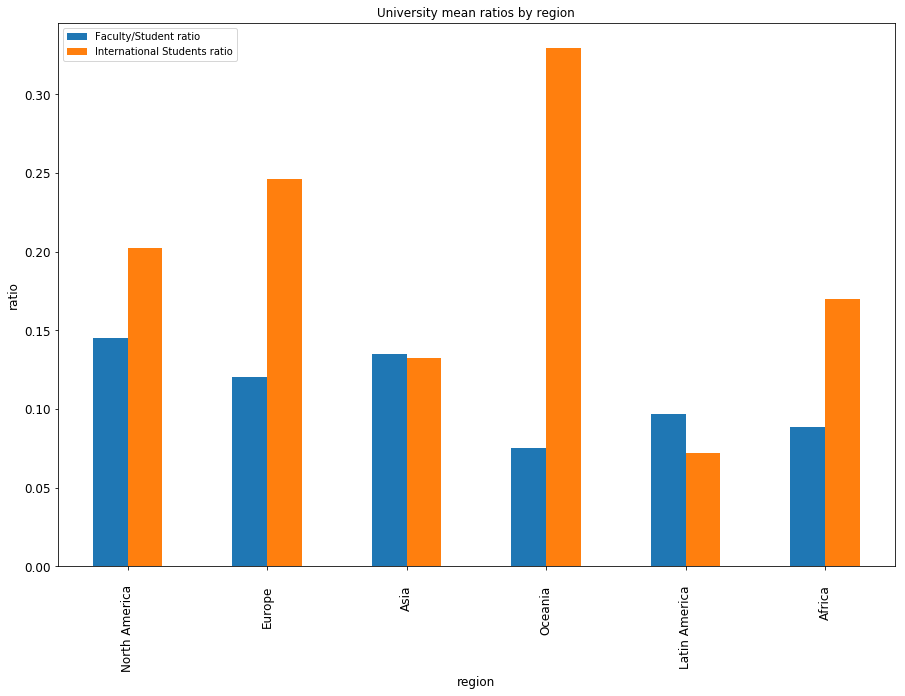

In [88]:
import matplotlib.pyplot as plt
ax = uni_s1_ratio_region[['ratioFacStuMean','ratioInterMean']].plot(kind='bar', title ="University mean ratios by region", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("region", fontsize=12)
ax.set_ylabel("ratio", fontsize=12)
ax.set_xticklabels(uni_s1_ratio_region.region.unique())
ax.tick_params(axis='x', which='major', pad=15)
plt.legend(['Faculty/Student ratio', 'International Students ratio'], loc='upper left')
plt.show()

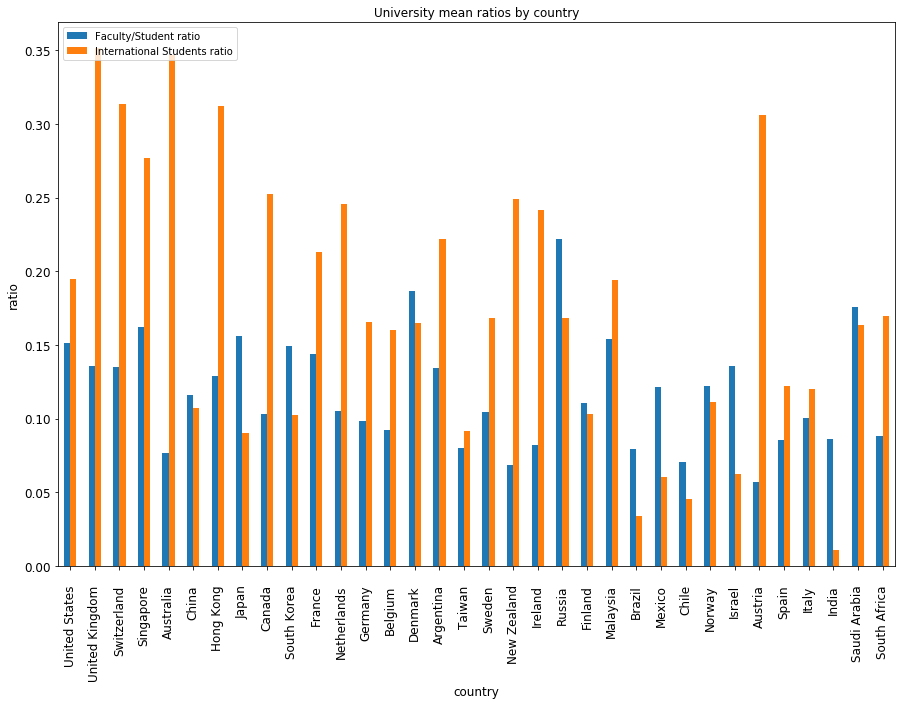

In [91]:
ax = uni_s1_ratio_country[['ratioFacStuMean','ratioInterMean']].plot(kind='bar', title ="University mean ratios by country", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("country", fontsize=12)
ax.set_ylabel("ratio", fontsize=12)
ax.set_xticklabels(uni_s1_ratio_country.country.unique())
ax.tick_params(axis='x', which='major', pad=15)
plt.legend(['Faculty/Student ratio', 'International Students ratio'], loc='upper left')
plt.show()

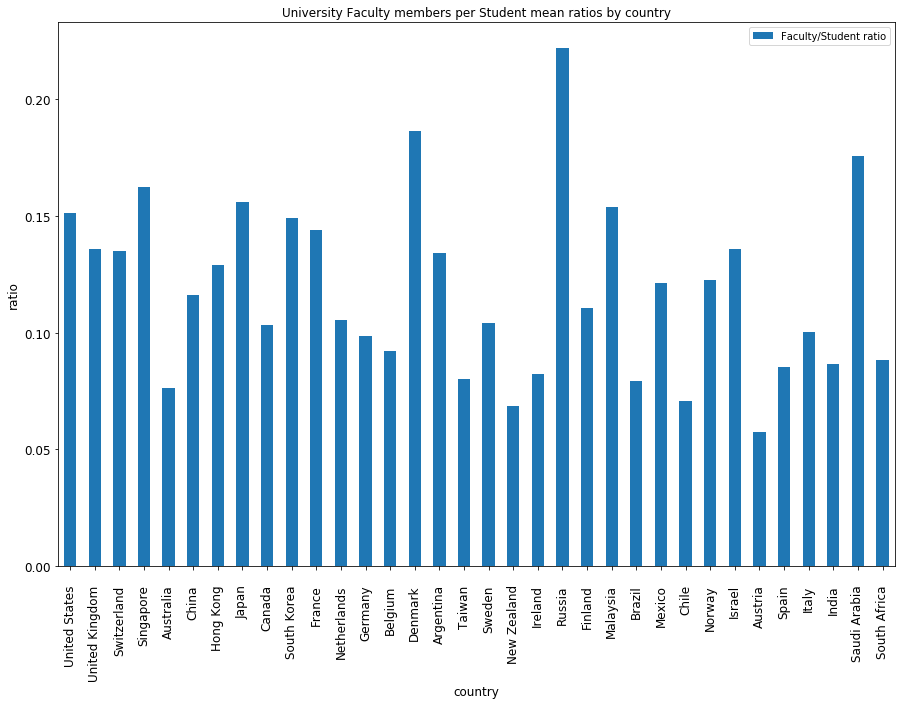

In [92]:
ax = uni_s1_ratio_country[['ratioFacStuMean']].plot(kind='bar', title ="University Faculty members per Student mean ratios by country", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("country", fontsize=12)
ax.set_ylabel("ratio", fontsize=12)
ax.set_xticklabels(uni_s1_ratio_country.country.unique())
ax.tick_params(axis='x', which='major', pad=15)
plt.legend(['Faculty/Student ratio'])
plt.show()

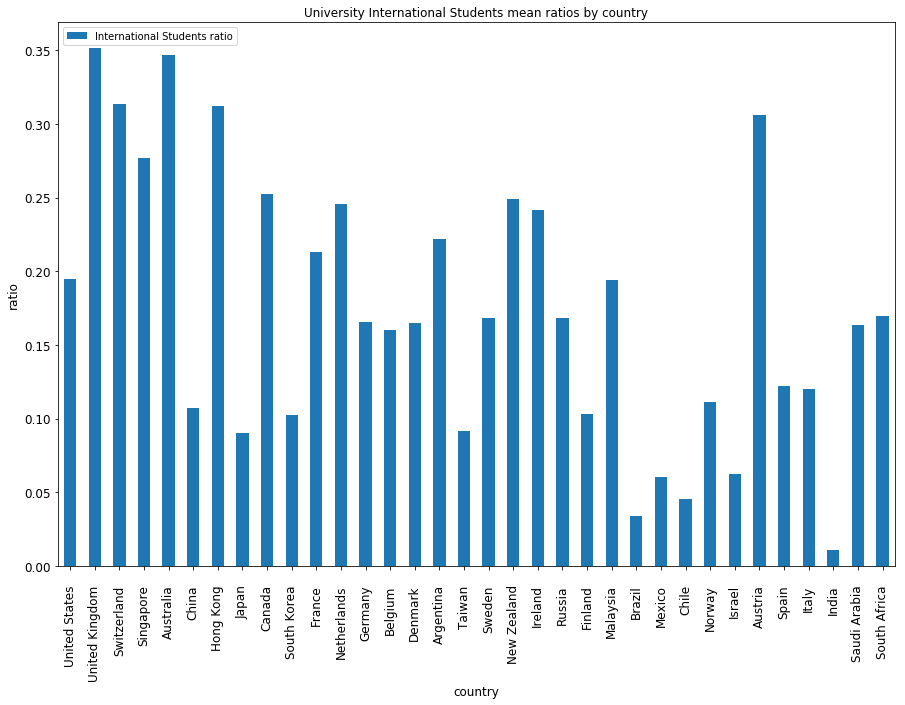

In [93]:
ax = uni_s1_ratio_country[['ratioInterMean']].plot(kind='bar', title ="University International Students mean ratios by country", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("country", fontsize=12)
ax.set_ylabel("ratio", fontsize=12)
ax.set_xticklabels(uni_s1_ratio_country.country.unique())
ax.tick_params(axis='x', which='major', pad=15)
plt.legend(['International Students ratio'], loc='upper left')
plt.show()